In [1]:
# Standard Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.pyplot import show
from sklearn import metrics
import pickle
import dill
from numpy import mean
from numpy import std
from pandas import read_csv
from timeit import default_timer as timer
import gc
import time
from contextlib import contextmanager
from collections import Counter
from matplotlib import pyplot
from numpy import where
import matplotlib.patches as mpatches
from collections import OrderedDict

In [2]:
# Transformers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, NearMiss, RandomUnderSampler

from sklearn.utils import resample
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek

In [3]:
# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline

In [4]:
# Modeling Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from lime import lime_tabular

In [5]:
# Machine Learning
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Lecture des bases de données

In [8]:
data_bureau = pd.read_csv("../Raw_data/bureau.csv")
data_bureau_balance = pd.read_csv("../Raw_data/bureau_balance.csv")
data_credit_card_balance = pd.read_csv("../Raw_data/credit_card_balance.csv")
data_HomeCredit_columns_description = pd.read_csv("../Raw_data/HomeCredit_columns_description.csv", encoding = 'unicode_escape')
data_installments_payments = pd.read_csv("../Raw_data/installments_payments.csv")
data_POS_CASH_balance = pd.read_csv("../Raw_data/POS_CASH_balance.csv")
data_previous_application = pd.read_csv("../Raw_data/previous_application.csv")
data_sample_submission = pd.read_csv("../Raw_data/sample_submission.csv")

data_application_test = pd.read_csv("../Raw_data/application_test.csv")
data_application_train = pd.read_csv("../Raw_data/application_train.csv")

## data_application_train

In [7]:
data_application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_application_train[data_application_train['SK_ID_CURR'] == 85]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [9]:
data_application_test[data_application_test['SK_ID_CURR'] == 85]


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [10]:
data_application_train.isna().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [11]:
data_application_train.shape

(307511, 122)

In [12]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("application_{train|test}.csv")]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [13]:
data_HomeCredit_columns_description.loc[1,"Description"]

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

Le dataset train est totalement déséquilibré en faveur de 0 (91.9%).

Le target 0 correspond aux clients qui n'ont pas de problèmes de paiement, ceux à qui on accordera plus facilement les prêts.

Text(0.5, 1.0, 'Répartition de Target')

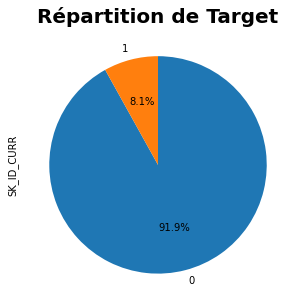

In [14]:
data_plot_pie = data_application_train.groupby("TARGET").count()
data_plot_pie.plot.pie(y='SK_ID_CURR', figsize=(
    5, 5), startangle=90, counterclock=False, autopct="%.1f%%", legend=None, colors=plt.cm.tab10.colors)
#plt.legend(loc="lower right")
plt.title("Répartition de Target", fontsize=20, fontweight = 'bold')

Text(0.5, 1.0, 'Répartition de Target')

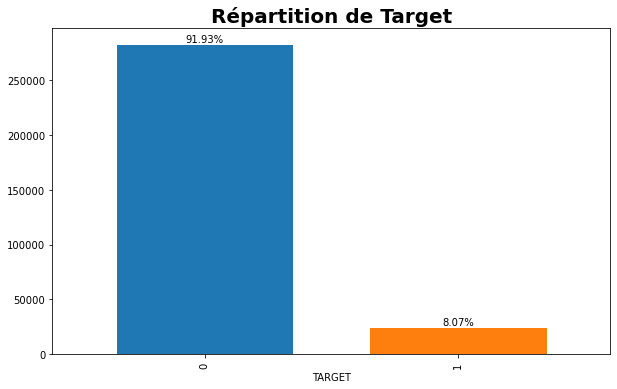

In [15]:
data_target_histo = data_application_train.groupby("TARGET")["SK_ID_CURR"].count().sort_values(ascending=False)

width = 0.7

fig = plt.figure(figsize=[10, 6])

ax = fig.add_subplot(111)

total = float(len(data_application_train))

data_target_histo.plot(kind='bar', edgecolor='white', color=plt.cm.tab10(np.arange(
    len(data_target_histo))), width=width, ax=ax, rot=90, legend=None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+2000,
            '{:1.2f}%'.format(height/total*100),
            ha="center"
            )

plt.title("Répartition de Target", fontsize=20, fontweight = 'bold')

## data_application_test

In [16]:
data_application_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data_application_test.isna().mean()

SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.124097
AMT_REQ_CREDIT_BUREAU_WEEK    0.124097
AMT_REQ_CREDIT_BUREAU_MON     0.124097
AMT_REQ_CREDIT_BUREAU_QRT     0.124097
AMT_REQ_CREDIT_BUREAU_YEAR    0.124097
Length: 121, dtype: float64

In [18]:
data_application_test.shape

(48744, 121)

## data_HomeCredit_columns_description

Ces données donnent les définitions des noms des colonnes de toutes les bases de données.

In [19]:
data_HomeCredit_columns_description.head(5)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [20]:
data_HomeCredit_columns_description.isna().mean()

Unnamed: 0     0.000000
Table          0.000000
Row            0.000000
Description    0.000000
Special        0.607306
dtype: float64

In [21]:
data_HomeCredit_columns_description.shape

(219, 5)

## data_bureau

In [22]:
data_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [23]:
data_bureau.isna().mean()

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [24]:
data_bureau.shape

(1716428, 17)

In [25]:
len(data_bureau["SK_ID_CURR"].unique())

305811

In [26]:
data_bureau["SK_ID_CURR"].value_counts()

120860    116
169704     94
318065     78
251643     61
425396     60
         ... 
206292      1
216537      1
106359      1
100212      1
250544      1
Name: SK_ID_CURR, Length: 305811, dtype: int64

In [27]:
len(data_bureau["SK_ID_BUREAU"].unique())

1716428

In [28]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("bureau.csv")]

,Unnamed: 0,Table,Row,Description,Special
122,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,129,bureau.csv,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN
131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,NaN


In [29]:
# exemple avec SK_ID_CURR = 215354
data_bureau[data_bureau["SK_ID_CURR"] == 215354]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.8,42103.80,0.00,0.0,Consumer credit,-22,NaN
225157,215354,5714458,Closed,currency 1,-1872,0,-776.0,-1203.0,NaN,0,494550.0,0.00,0.00,0.0,Consumer credit,-696,NaN
225158,215354,5714459,Closed,currency 1,-1734,0,-638.0,-1336.0,NaN,0,1084032.0,0.00,NaN,0.0,Car loan,-1336,NaN
225159,215354,5714460,Closed,currency 1,-1333,0,-1089.0,-987.0,NaN,0,102150.0,NaN,NaN,0.0,Consumer credit,-984,NaN


## data_bureau_balance

In [30]:
data_bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [31]:
data_bureau_balance.isna().mean()

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [32]:
data_bureau_balance.shape

(27299925, 3)

In [33]:
data_bureau_balance["STATUS"].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [34]:
# exemple, tri sur SK_ID_BUREAU = 5715448
# cet exemple sera utilisé par la suite

data_bureau_balance[data_bureau_balance["SK_ID_BUREAU"] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [35]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("bureau_balance.csv")]

,Unnamed: 0,Table,Row,Description,Special
139,142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
140,143,bureau_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
141,144,bureau_balance.csv,STATUS,Status of Credit Bureau loan during the month ...,NaN


## data_credit_card_balance

In [36]:
data_credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [37]:
data_credit_card_balance.isna().mean()

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
MONTHS_BALANCE                0.000000
AMT_BALANCE                   0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_DRAWINGS_ATM_CURRENT      0.195249
AMT_DRAWINGS_CURRENT          0.000000
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
AMT_INST_MIN_REGULARITY       0.079482
AMT_PAYMENT_CURRENT           0.199981
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
AMT_RECIVABLE                 0.000000
AMT_TOTAL_RECEIVABLE          0.000000
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_CURRENT          0.000000
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
NAME_CONTRACT_STATUS          0.000000
SK_DPD                        0.000000
SK_DPD_DEF                    0.000000
dtype: float64

In [38]:
data_credit_card_balance.shape

(3840312, 23)

In [39]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("credit_card_balance.csv")]

,Unnamed: 0,Table,Row,Description,Special
150,153,credit_card_balance.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
151,154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
152,155,credit_card_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
153,156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
154,157,credit_card_balance.csv,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...,NaN
155,158,credit_card_balance.csv,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...,NaN
156,159,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,NaN
157,160,credit_card_balance.csv,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...,NaN
158,161,credit_card_balance.csv,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...,NaN
159,162,credit_card_balance.csv,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...,NaN


## data_installments_payments

In [40]:
data_installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [41]:
data_installments_payments.isna().mean()

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.000214
dtype: float64

In [42]:
data_installments_payments.shape

(13605401, 8)

In [43]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("installments_payments.csv")]

,Unnamed: 0,Table,Row,Description,Special
211,214,installments_payments.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
213,216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
218,221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


## data_POS_CASH_balance

In [44]:
data_POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [45]:
data_POS_CASH_balance.isna().mean()

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.002607
CNT_INSTALMENT_FUTURE    0.002608
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [46]:
data_POS_CASH_balance.shape

(10001358, 8)

In [47]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("POS_CASH_balance.csv")]

,Unnamed: 0,Table,Row,Description,Special
142,145,POS_CASH_balance.csv,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
144,147,POS_CASH_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
145,148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
146,149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
147,150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
148,151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previo...,NaN
149,152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,NaN


## data_previous_application

In [48]:
data_previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data_previous_application.isna().mean()

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [50]:
data_previous_application.shape

(1670214, 37)

In [51]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("previous_application.csv")]

,Unnamed: 0,Table,Row,Description,Special
173,176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
175,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
177,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
178,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
179,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
180,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
181,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
182,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


## data_sample_submission

In [52]:
data_sample_submission.head(5)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [53]:
data_sample_submission.isna().mean()

SK_ID_CURR    0.0
TARGET        0.0
dtype: float64

In [54]:
data_sample_submission.shape

(48744, 2)

In [55]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Table"].str.contains("submission")]

,Unnamed: 0,Table,Row,Description,Special


In [56]:
data_HomeCredit_columns_description[data_HomeCredit_columns_description["Row"].str.contains("SK_ID_CURR")]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
122,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
151,154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed


In [57]:
data_sample_submission["TARGET"].unique()

array([0.5])

# Création d'une base de données unique

In [58]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('../Raw_data/application_train.csv', nrows= num_rows)
    df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    test_df = pd.read_csv('../Raw_data/application_test.csv', nrows= num_rows)
    test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = False):
    bureau = pd.read_csv('../Raw_data/bureau.csv', nrows = num_rows)
    bureau = bureau.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    bb = pd.read_csv('../Raw_data/bureau_balance.csv', nrows = num_rows)
    bb = bb.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    cat_cols = bb_cat + bureau_cat
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = False):
    prev = pd.read_csv('../Raw_data/previous_application.csv', nrows = num_rows)
    prev = prev.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= False)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = False):
    pos = pd.read_csv('../Raw_data/POS_CASH_balance.csv', nrows = num_rows)
    pos = pos.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= False)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = False):
    ins = pd.read_csv('../Raw_data/installments_payments.csv', nrows = num_rows)
    ins = ins.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= False)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = False):
    cc = pd.read_csv('../Raw_data/credit_card_balance.csv', nrows = num_rows)
    cc = cc.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= False)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg


In [59]:
# Définition du nombre de lignes à utiliser pour créer le dataframe global
# None : pour avoir toutes les lignes

#num_rows = 20000
num_rows = None

In [60]:
# nan_as_category : variable, pour mettre la valeur Nan comme catégorie au non

#nan_as_category = True
nan_as_category = False

## fonction application_train_test

In [61]:
# application_train_test ajoute les lignes des données data_application_train et data_application_test
# ajout des colonnes one-hot-encoder du dataframe

df = application_train_test(num_rows, nan_as_category)
print(df.shape)

Train samples: 307511, test samples: 48744
(356251, 248)


In [62]:
# Target comprend des 0, 1 et nan.
# Les nan proviennent de data_application_test puisqu'il n'y a pas de colonne "Target"

df["TARGET"].unique()

array([ 1.,  0., nan])

## fonction bureau_and_balance

### fonction bureau_and_balance - détail

In [63]:
# Lecture des données bureau et bureau_balance
# one-hot-encoder pour les colonnes catégorielles des deux dataframes

bureau = pd.read_csv('../Raw_data/bureau.csv', nrows = num_rows)
bureau = bureau.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
bb = pd.read_csv('../Raw_data/bureau_balance.csv', nrows = num_rows)
bb = bb.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # ajout suite à erreur
bb, bb_cat = one_hot_encoder(bb, nan_as_category)
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

In [64]:
# dans le fichier data_HomeCredit_columns_description décrivant les données,
# il y a une erreur : SK_BUREAU_ID au lieu de SK_ID_BUREAU dans le dataframe
# SK_ID_BUREAU : Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
# use this to join to CREDIT_BUREAU table

# bb est basée sur le dataframe data_bureau_balance, avec le one-hot-encoding de la colonne status (§1.5)

# exemple, tri sur SK_ID_BUREAU = 5715448, vu dans §1.3

bb[bb["SK_ID_BUREAU"] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0
5,5715448,-5,0,0,0,0,0,0,1,0
6,5715448,-6,0,0,0,0,0,0,1,0
7,5715448,-7,0,0,0,0,0,0,1,0
8,5715448,-8,0,0,0,0,0,0,1,0
9,5715448,-9,1,0,0,0,0,0,0,0


In [65]:
# SK_ID_CURR : ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau

# bureau est basée sur le dataframe data_bureau, avec le one-hot-encoding des colonnes catégorielles (§1.4)

# exemple, pour SK_ID_BUREAU = 5715448, SK_ID_CURR = 380361

bureau[bureau["SK_ID_BUREAU"] == 5715448]

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
768,380361,5715448,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
bureau = bureau_and_balance(num_rows, nan_as_category)
print("Bureau df shape:", bureau.shape)

Bureau df shape: (305811, 112)


In [67]:
# exemple : pour SK_ID_BUREAU = 5715448, SK_ID_CURR = 380361
bureau.loc[380361,:]

BURO_DAYS_CREDIT_MIN                -2631.000000
BURO_DAYS_CREDIT_MAX                 -112.000000
BURO_DAYS_CREDIT_MEAN                -872.352941
BURO_DAYS_CREDIT_VAR               388632.992647
BURO_DAYS_CREDIT_ENDDATE_MIN        -1084.000000
                                       ...      
CLOSED_CNT_CREDIT_PROLONG_SUM           0.000000
CLOSED_MONTHS_BALANCE_MIN_MIN         -86.000000
CLOSED_MONTHS_BALANCE_MAX_MAX           0.000000
CLOSED_MONTHS_BALANCE_SIZE_MEAN        29.000000
CLOSED_MONTHS_BALANCE_SIZE_SUM        290.000000
Name: 380361, Length: 112, dtype: float64

In [68]:
# exemple : pour SK_ID_BUREAU = 5715448, SK_ID_CURR = 380361
data_bureau[data_bureau["SK_ID_CURR"] == 380361]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
768,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
769,380361,5715449,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,2691.0
770,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0
771,380361,5715452,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0
772,380361,5715453,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0
773,380361,5715454,Closed,currency 1,-1622,0,-1074.0,-1073.0,NaN,0,540000.0,0.0,0.0,0.0,Consumer credit,-1006,0.0
774,380361,5715455,Closed,currency 1,-2631,0,-804.0,-1096.0,NaN,0,2205000.0,0.0,0.0,0.0,Car loan,-944,NaN
775,380361,5715456,Closed,currency 1,-1449,0,-1084.0,-1267.0,NaN,0,60480.0,0.0,0.0,0.0,Consumer credit,-1259,NaN
776,380361,5715457,Active,currency 1,-222,0,874.0,NaN,NaN,0,202500.0,31594.5,0.0,0.0,Credit card,-18,0.0
777,380361,5715458,Closed,currency 1,-749,0,-111.0,-110.0,NaN,0,1267843.5,0.0,NaN,0.0,Consumer credit,-110,0.0


In [69]:
# exemple : pour SK_ID_BUREAU = 5715448, SK_ID_CURR = 380361
data_bureau_balance[data_bureau_balance["SK_ID_BUREAU"] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [70]:
# exemple : pour SK_ID_BUREAU = 5715448, SK_ID_CURR = 380361
data_application_train[data_application_train["SK_ID_CURR"] == 380361]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
242164,380361,0,Cash loans,F,Y,Y,0,315000.0,450000.0,11871.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Les numéros SK_ID_CURR sont uniques dans les dataframe data_application_train et data_application_test.

In [71]:
data_application_train.sort_values("SK_ID_CURR", ascending=True).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
data_application_test.sort_values("SK_ID_CURR", ascending=True).head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# exemple : SK_ID_CURR = 100001
data_bureau[data_bureau["SK_ID_CURR"] == 100001]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.0,373239.0,0.0,0.0,Consumer credit,-16,10822.5
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5


In [74]:
df = df.join(bureau, how='left', on='SK_ID_CURR')
del bureau

In [75]:
# On merge les dataframes df et bureau, on retrouve toutes les données de data_application_train et data_application_test
df.sort_values("SK_ID_CURR", ascending=True).head()

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM
307511,0,100001,NaN,1,0,0,0,135000.0,568800.0,20560.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-51.0,0.0,35.0,140.0
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-47.0,0.0,15.0,90.0
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
307512,1,100005,NaN,0,0,0,0,99000.0,222768.0,17370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,0.0,13.0,13.0


## fonction previous_applications

In [76]:
prev = previous_applications(num_rows, nan_as_category)
print("Previous applications df shape:", prev.shape)
df = df.join(prev, how='left', on='SK_ID_CURR')
del prev

Previous applications df shape: (338857, 233)


## fonction pos_cash

In [77]:
pos = pos_cash(num_rows, nan_as_category)
print("Pos-cash balance df shape:", pos.shape)
df = df.join(pos, how='left', on='SK_ID_CURR')
del pos

Pos-cash balance df shape: (337252, 17)


## fonction installments_payments

In [78]:
ins = installments_payments(num_rows, nan_as_category)
print("Installments payments df shape:", ins.shape)
df = df.join(ins, how='left', on='SK_ID_CURR')
del ins

Installments payments df shape: (339587, 26)


## fonction credit_card_balance

In [79]:
cc = credit_card_balance(num_rows, nan_as_category)
print("Credit card balance df shape:", cc.shape)
df = df.join(cc, how='left', on='SK_ID_CURR')
del cc

Credit card balance df shape: (103558, 136)


## Base globale

Le dataframe comprend une colonne index inutile, que je supprime.

In [80]:
df.head(2)

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df = df.drop('index', 1)

Finalement, la base globale obtenue comprend :
    - 356251 lignes
    - 772 colonnes
    
La liste list_col_bin_encod comprend les noms des colonnes catégorielles qui ont été encodées binairement:
 - CODE_GENDER : M = 0 / F = 1
 - FLAG_OWN_CAR : N = 0 / Y = 1
 - FLAG_OWN_REALTY : N = 1 / Y = 0
 
La liste list_col_binary comprend les noms des colonnes qui n'ont que 2 valeurs (0 ou 1).
Ces colonnes n'ont pas été encodées, les valeurs étaient ainsi définies à l'origine.

In [82]:
df.shape

(356251, 771)

In [83]:
# Les données catégorielles de ces trois colonnes ont été encodées de façon binaire
list_col_bin_encod = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [84]:
df.loc[:,['SK_ID_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].head(5)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,100002,0,0,0
1,100003,1,0,1
2,100004,0,1,0
3,100006,1,0,0
4,100007,0,0,0


In [85]:
data_application_train[data_application_train['SK_ID_CURR'] == 100002]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


Certaines colonnes du dataframe ont des valeurs binaires, avec :

    - 0 pour non
    - 1 pour oui
    
Exemple : FLAG_MOBIL : est-ce que le client a un téléphone mobile ?

In [86]:
df_col = df.columns.to_list()

In [87]:
df_target = df[df['TARGET'].isnull() == False]

In [88]:
list_col_binary = []

for name in df_col :
    number = df_target[name].unique()
    if len(number) < 3 :
        list_col_binary.append(name)

In [89]:
list_col_binary = [col for col in list_col_binary if (col not in list_col_bin_encod and col != 'TARGET')]

In [90]:
list_col_binary

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TY

In [92]:
df[list_col_binary].isna().mean()

FLAG_MOBIL                                   0.000000
FLAG_EMP_PHONE                               0.000000
FLAG_WORK_PHONE                              0.000000
FLAG_CONT_MOBILE                             0.000000
FLAG_PHONE                                   0.000000
                                               ...   
CC_SK_DPD_DEF_MIN                            0.709312
CC_NAME_CONTRACT_STATUS_Approved_MIN         0.709312
CC_NAME_CONTRACT_STATUS_Demand_MIN           0.709312
CC_NAME_CONTRACT_STATUS_Refused_MIN          0.709312
CC_NAME_CONTRACT_STATUS_Sent proposal_MIN    0.709312
Length: 172, dtype: float64

Le dataframe comprend plusieurs types de données.
Je vais harmoniser les colonnes contenant des entiers en passant tout en int8.

In [96]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [97]:
df.loc[:,['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH']].head(5)

,SK_ID_CURR,DAYS_BIRTH,DAYS_ID_PUBLISH
0,100002,-9461,-2120
1,100003,-16765,-291
2,100004,-19046,-2531
3,100006,-19005,-2437
4,100007,-19932,-3458


Le dataframe contient 58 valeurs infinies.
Les lignes contenant ces caleurs vont être supprimées.

In [98]:
count = np.isinf(df[df['TARGET'].isnull() == False]).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 58 infinite values


In [99]:
print("printing column name where infinity is present")
col_name = df.columns.to_series()[np.isinf(df).any()]
print(col_name)
  
# printing row index with infinity
print()
print("printing row index with infinity ")
  
row_inf = df.index[np.isinf(df).any(1)]
print(row_inf)

printing column name where infinity is present
PREV_APP_CREDIT_PERC_MAX            PREV_APP_CREDIT_PERC_MAX
PREV_APP_CREDIT_PERC_MEAN          PREV_APP_CREDIT_PERC_MEAN
REFUSED_APP_CREDIT_PERC_MAX      REFUSED_APP_CREDIT_PERC_MAX
REFUSED_APP_CREDIT_PERC_MEAN    REFUSED_APP_CREDIT_PERC_MEAN
INSTAL_PAYMENT_PERC_MAX              INSTAL_PAYMENT_PERC_MAX
INSTAL_PAYMENT_PERC_MEAN            INSTAL_PAYMENT_PERC_MEAN
INSTAL_PAYMENT_PERC_SUM              INSTAL_PAYMENT_PERC_SUM
dtype: object

printing row index with infinity 
Int64Index([  5687,  60477,  79077,  89018,  98509, 126768, 128791, 140426,
            152087, 167136, 199103, 201086, 236164, 238381, 272829, 277962,
            287300, 292852, 305373, 310339],
           dtype='int64')


In [100]:
df = df.drop(row_inf, 0)

# Nettoyage de la base de données

## Valeurs manquantes

Le dataframe global comprend beaucoup de Nan.

Sur 772 colonnes, 591 comprennent des valeurs manquantes (entre 5% et 85%).

In [101]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [102]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(40)

Your selected dataframe has 771 columns.
There are 591 columns that have missing values.


,Missing Values,% of Total Values
REFUSED_RATE_DOWN_PAYMENT_MAX,303633,85.2
REFUSED_RATE_DOWN_PAYMENT_MEAN,303633,85.2
REFUSED_AMT_DOWN_PAYMENT_MIN,303633,85.2
REFUSED_AMT_DOWN_PAYMENT_MAX,303633,85.2
REFUSED_AMT_DOWN_PAYMENT_MEAN,303633,85.2
REFUSED_RATE_DOWN_PAYMENT_MIN,303633,85.2
REFUSED_APP_CREDIT_PERC_VAR,298015,83.7
CC_AMT_PAYMENT_CURRENT_VAR,284632,79.9
CC_AMT_DRAWINGS_ATM_CURRENT_VAR,284542,79.9
CC_AMT_DRAWINGS_OTHER_CURRENT_VAR,284542,79.9


Je ne conserve pas les colonnes qui ont plus de 75% de valeurs manquantes.

In [103]:
list_missing_values = missing_values[missing_values["% of Total Values"] > 75].index.to_list()

In [104]:
# Nouvelles colonnes du dataframe
df_col = [col for col in df_col if (col not in list_missing_values)]

In [105]:
df = df[df_col]

In [106]:
df.shape

(356231, 736)

Les colonnes list_col_bin_encod ne comportent aucune données manquantes.

In [107]:
df.loc[:,list_col_bin_encod].isna().mean()

CODE_GENDER        0.0
FLAG_OWN_CAR       0.0
FLAG_OWN_REALTY    0.0
dtype: float64

Pour remplacer les valeurs manquantes, il faut considérer les différents types de colonnes :
- numériques
- catégorielles (encodées par 0 ou 1) : liste list_col_binary

Pour les données catégorielles (encodées par 0 ou 1), les valeurs manquantes seront remplacées par 0.
Le 0 correspond à non.

Pour les données numériques, les données manquantes seront remplacées par la médiane, en fonction du Target (0 ou 1).

In [108]:
df.to_csv("Dataframe_with_NaN.csv")

In [109]:
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
list_ID_customer = ['SK_ID_CURR']

In [111]:
num_cols = [col for col in df_col if (col not in list_col_bin_encod and col not in list_col_binary
                                      and col != 'TARGET' and col != 'index' and col!='SK_ID_CURR')]

In [112]:
with open('num_cols.pkl', 'wb') as f:
    pickle.dump(num_cols, f)

In [113]:
with open('list_col_bin_encod.pkl', 'wb') as f:
    pickle.dump(list_col_bin_encod, f)

In [114]:
with open('list_col_binary.pkl', 'wb') as f:
    pickle.dump(list_col_binary, f)

In [115]:
with open('list_ID_customer.pkl', 'wb') as f:
    pickle.dump(list_ID_customer, f)

## Enregistrement intermédiaire

In [6]:
df = pd.read_csv("Dataframe_with_NaN.csv")

In [7]:
df = df.drop('Unnamed: 0', 1)

In [15]:
with open('num_cols.pkl', 'rb') as f:
    num_cols = pickle.load(f)

In [16]:
with open('list_col_bin_encod.pkl', 'rb') as f:
    list_col_bin_encod = pickle.load(f)

In [17]:
with open('list_col_binary.pkl', 'rb') as f:
    list_col_binary = pickle.load(f)

In [18]:
with open('list_ID_customer.pkl', 'rb') as f:
    list_ID_customer = pickle.load(f)

## Séparation dataframe train / set

Le dataframe global comprend les données pour l'entrainement et le test, pour une compétition Kaggle.

Le dataframe test ne comprend pas de target.

Je vais donc séparer ces deux dataframes.

In [12]:
train_df = df[df['TARGET'].isnull() == False]

In [13]:
train_df.shape

(307488, 736)

In [14]:
train_df['TARGET'].unique()

array([1., 0.])

In [119]:
train_df_copy = train_df.copy()

In [120]:
train_df = train_df_copy

In [121]:
test_df = df[df['TARGET'].isnull() == True]

In [122]:
test_df.shape

(48743, 736)

In [123]:
test_df['TARGET'].unique()

array([nan])

In [15]:
del df

# Modèles

Pour étudier différents modèles, je vais prendre un échantillon du dataframe pour faire une évaluation plus rapide.

In [16]:
data_reduite = train_df.sample(frac=0.1).reset_index(drop=True)

In [17]:
data_reduite.shape

(30749, 736)

In [18]:
y = data_reduite['TARGET']
y = y.reset_index(drop=True)
X = data_reduite.copy()
X = X.drop(["TARGET"], axis=1)
X = X.reset_index(drop=True)

Je partage le dataframe data_reduite en deux parties :
    - une partie train : pour entrainer les modèles
    - une partie test 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [20]:
y_train.value_counts()

0.0    21136
1.0     1925
Name: TARGET, dtype: int64

In [21]:
y_test.value_counts()

0.0    7046
1.0     642
Name: TARGET, dtype: int64

## Premiers modèles

In [131]:
results = pd.DataFrame(columns=['MODEL','THRESHOLD', 'TIME',
                                'TRAIN_ROC_AUC_MEAN', 'TRAIN_ROC_AUC_MEAN_STD',
                                'TEST_ROC_AUC_MEAN', 'TEST_ROC_AUC_MEAN_STD',
                                'TRAIN_F2_SCORE_MEAN', 'TRAIN_F2_SCORE_STD',
                                'TEST_F2_SCORE_MEAN', 'TEST_F2_SCORE_STD',])

In [134]:
# define models to test
def get_models():
    models, names = list(), list()
    # DC
    models.append(DummyClassifier())
    names.append('DC')
    # KNC
    models.append(KNeighborsClassifier())
    names.append('KNC')
    # SGD
    models.append(SGDClassifier())
    names.append('SGD')
    # BNB
    models.append(BernoulliNB())
    names.append('BNB')    
    # LGBM
    models.append(LGBMClassifier())
    names.append('LGBM')
    # LR
    models.append(LogisticRegression(max_iter=1000))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # SVM
    models.append(SVC())
    names.append('SVM')
    # DTC
    models.append(DecisionTreeClassifier())
    names.append('DTC')
    # RFC
    models.append(RandomForestClassifier())
    names.append('RFC')
    # GBC
    models.append(GradientBoostingClassifier())
    names.append('GBC')    
    return models, names

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# evaluate a model
def cross_validate(X_train, y_train, pipeline):
    train_roc_auc = []
    train_f2_score =[]
    test_roc_auc = []
    test_f2_score =[]
    
    X_train = X_train.reset_index()
    y_train = y_train.reset_index(drop=True)
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        pipeline.fit(X_t, y_t)
        y_hat_t = pipeline.predict(X_t)
        roc_auc_score_train = roc_auc_score(y_t, y_hat_t)
        f2_score_train = f2_measure(y_t, y_hat_t)
        train_roc_auc.append(roc_auc_score_train)
        train_f2_score.append(f2_score_train)
        
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = pipeline.predict(X_val)
        roc_auc_score_val = roc_auc_score(y_val, y_hat_val)
        f2_score_val = f2_measure(y_val, y_hat_val)
        test_roc_auc.append(roc_auc_score_val)
        test_f2_score.append(f2_score_val)
    
    return train_roc_auc, train_f2_score, test_roc_auc, test_f2_score


# list_col_bin_encod : colonnes catégorielles encodées binairement --> pas de NaN, ne pas scaler
# list_col_binary : colonnes avec valeur binaires d'origine --> remplacer NaN par 0, ne pas scaler
# list_ID_customer : ID client --> ne pas encoder, ne pas scaler
# num_cols : toutes les autres colonnes numériques --> remplacer NaN par médiane, scaler


# define models
models, names = get_models()
results_AUC = list()
results_F2 = list()
results_time = list()

# evaluate each model
for i in range(len(models)):
    results_inter = [models[i]]
    
    #Creating the pipeline preprocessor
    numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
    binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
    preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols),
            ('bin', binary_transformer, list_col_binary),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')
     
    # wrap the model i a pipeline
    threshold = 0.10
    
    pipeline = Pipeline(steps=[('preprocess',preprocessor),
                               ('selector', VarianceThreshold(threshold=threshold)),
                               ('models',models[i])])

    # evaluate the model and store results
    start = timer()

    train_roc_auc, train_f2_score, test_roc_auc, test_f2_score = cross_validate(
                                    X_train, y_train, pipeline)
    end = timer()
    time = end - start
     
    results_AUC.append(train_roc_auc)
    results_F2.append(train_f2_score)
    results_time.append(time)
    results_inter.append(threshold)
    results_inter.append(time)
    results_inter.append(mean(train_roc_auc))
    results_inter.append(std(train_roc_auc))
    results_inter.append(mean(test_roc_auc))
    results_inter.append(std(test_roc_auc))
    results_inter.append(mean(train_f2_score))
    results_inter.append(std(train_f2_score))
    results_inter.append(mean(test_f2_score))
    results_inter.append(std(test_f2_score))
    
    # summarize and store
    print('AUC : %s %.3f (%.3f)' % (names[i], mean(train_roc_auc), std(train_roc_auc)))
    print('F2 : %s %.3f (%.3f)' % (names[i], mean(train_f2_score), std(train_f2_score)))
    results_inter_2 = pd.DataFrame([results_inter], columns = results.columns) 
    results = results.append(results_inter_2, ignore_index=True) 


AUC : DC 0.500 (0.000)
F2 : DC 0.000 (0.000)
AUC : KNC 0.511 (0.002)
F2 : KNC 0.029 (0.004)
AUC : SGD 0.505 (0.012)
F2 : SGD 0.039 (0.079)
AUC : BNB 0.622 (0.004)
F2 : BNB 0.328 (0.006)
AUC : LGBM 0.715 (0.004)
F2 : LGBM 0.486 (0.008)
AUC : LR 0.519 (0.006)
F2 : LR 0.051 (0.017)
AUC : LDA 0.545 (0.002)
F2 : LDA 0.118 (0.005)
AUC : NB 0.580 (0.013)
F2 : NB 0.324 (0.006)
AUC : SVM 0.500 (0.000)
F2 : SVM 0.000 (0.000)
AUC : DTC 1.000 (0.000)
F2 : DTC 1.000 (0.000)
AUC : RFC 1.000 (0.000)
F2 : RFC 0.999 (0.001)
AUC : GBC 0.530 (0.003)
F2 : GBC 0.074 (0.007)


In [135]:
results

,MODEL,THRESHOLD,TIME,TRAIN_ROC_AUC_MEAN,TRAIN_ROC_AUC_MEAN_STD,TEST_ROC_AUC_MEAN,TEST_ROC_AUC_MEAN_STD,TRAIN_F2_SCORE_MEAN,TRAIN_F2_SCORE_STD,TEST_F2_SCORE_MEAN,TEST_F2_SCORE_STD
0,DummyClassifier(),0.1,73.299421,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,KNeighborsClassifier(),0.1,470.141073,0.511245,0.001586,0.499378,0.001131,0.029245,0.004008,0.001602,0.002904
2,SGDClassifier(),0.1,191.359178,0.505137,0.011723,0.504067,0.009946,0.038576,0.079367,0.036790,0.078059
3,BernoulliNB(),0.1,80.444860,0.621617,0.004343,0.612843,0.019358,0.328362,0.005935,0.316824,0.025812
4,LGBMClassifier(),0.1,134.475827,0.715345,0.004155,0.512181,0.005800,0.486009,0.008465,0.033846,0.014303
5,LogisticRegression(max_iter=1000),0.1,220.453202,0.519004,0.006473,0.510908,0.007410,0.050582,0.016863,0.032287,0.018905
6,LinearDiscriminantAnalysis(),0.1,125.722862,0.545188,0.002196,0.523755,0.007787,0.118242,0.005223,0.071340,0.018248
7,GaussianNB(),0.1,80.606605,0.579674,0.012989,0.557923,0.021719,0.324168,0.005736,0.307951,0.013334
8,SVC(),0.1,1864.477747,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
9,DecisionTreeClassifier(),0.1,437.870594,1.000000,0.000000,0.531012,0.013244,1.000000,0.000000,0.142624,0.023763


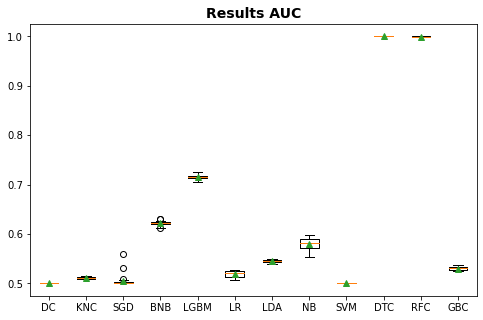

In [136]:
fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)
ax.boxplot(results_AUC, labels=names, showmeans=True)
ax.set_title('Results AUC', fontsize=14, fontweight='bold')

plt.show()

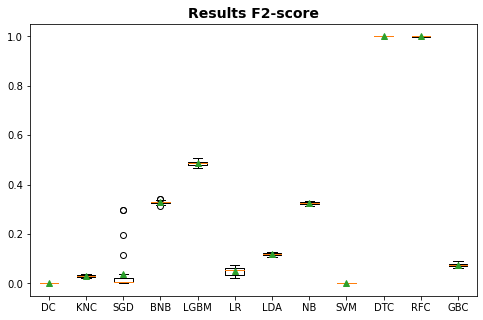

In [137]:
fig = plt.figure(figsize = (8,5))

ax = fig.add_subplot(111)
ax.boxplot(results_F2, labels=names, showmeans=True)
ax.set_title('Results F2-score', fontsize=14, fontweight='bold')

plt.show()

In [138]:
results.to_csv("Results_frac_010_thres_010.csv")

In [140]:
results.sort_values('TRAIN_ROC_AUC_MEAN', ascending=False)

,MODEL,THRESHOLD,TIME,TRAIN_ROC_AUC_MEAN,TRAIN_ROC_AUC_MEAN_STD,TEST_ROC_AUC_MEAN,TEST_ROC_AUC_MEAN_STD,TRAIN_F2_SCORE_MEAN,TRAIN_F2_SCORE_STD,TEST_F2_SCORE_MEAN,TEST_F2_SCORE_STD
9,DecisionTreeClassifier(),0.1,437.870594,1.000000,0.000000,0.531012,0.013244,1.000000,0.000000,0.142624,0.023763
10,"(DecisionTreeClassifier(max_features='auto', r...",0.1,834.306130,0.999651,0.000362,0.500177,0.000694,0.999441,0.000580,0.000461,0.001725
4,LGBMClassifier(),0.1,134.475827,0.715345,0.004155,0.512181,0.005800,0.486009,0.008465,0.033846,0.014303
3,BernoulliNB(),0.1,80.444860,0.621617,0.004343,0.612843,0.019358,0.328362,0.005935,0.316824,0.025812
7,GaussianNB(),0.1,80.606605,0.579674,0.012989,0.557923,0.021719,0.324168,0.005736,0.307951,0.013334
6,LinearDiscriminantAnalysis(),0.1,125.722862,0.545188,0.002196,0.523755,0.007787,0.118242,0.005223,0.071340,0.018248
11,([DecisionTreeRegressor(criterion='friedman_ms...,0.1,2872.162685,0.530066,0.002784,0.507674,0.005416,0.074376,0.006789,0.021694,0.013285
5,LogisticRegression(max_iter=1000),0.1,220.453202,0.519004,0.006473,0.510908,0.007410,0.050582,0.016863,0.032287,0.018905
1,KNeighborsClassifier(),0.1,470.141073,0.511245,0.001586,0.499378,0.001131,0.029245,0.004008,0.001602,0.002904
2,SGDClassifier(),0.1,191.359178,0.505137,0.011723,0.504067,0.009946,0.038576,0.079367,0.036790,0.078059


## Modèles pré-sélectionnés

Parmi les dix modèles testés, je vais en garder trois qui ont les meilleeures performances dans les métriques ROC AUC et F2 score :

    - Bernoulli Naive Bayes
    - LGBM classifier
    - Random Forest Classifier

### Impact des paramètres

In [141]:
improved_results = pd.DataFrame(columns=['MODEL','TIME', 'BEST_PIPE', 'TRAIN_ROC_AUC_MEAN', 'TRAIN_ROC_AUC_MEAN_STD',
                                   'VAL_ROC_AUC_MEAN', 'VAL_ROC_AUC_MEAN_STD', 'TRAIN_F2_MEAN', 'TRAIN_F2_STD',       
                                   'VAL_F2_MEAN', 'TEST_F2_STD', 'TRAIN_COST_SCORE_MEAN', 'TRAIN_COST_SCORE_STD',        
                                   'VAL_COST_SCORE_MEAN', 'VAL_COST_SCORE_STD'])

In [142]:
# define models to test
def get_models():
    models, names = list(), list()
    # BNB
    models.append(BernoulliNB())
    names.append('BNB')  
    # LGBM
    models.append(LGBMClassifier())
    names.append('LGBM')
    # RFC
    models.append(RandomForestClassifier())
    names.append('RFC')
    return models, names


# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# calculate cost_score
def score_cost(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True )
    cost_score = (9*report['0.0']['precision']+ report['0.0']['recall']+report['1.0']['precision']+9*report['1.0']['recall'])/20
    return cost_score


def grid_search(X_train, y_train, pipeline, parameters):
    train_roc_auc = []
    train_f2_score =[]
    val_roc_auc = []
    val_f2_score =[]
    train_cost_score = []
    val_cost_score = []
    
    X_train = X_train.reset_index()
    y_train = y_train.reset_index(drop=True)
    
    # define evaluation procedure
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)   
    
    search = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=cv, n_jobs=-1)
   
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        best_pipe = search.best_estimator_
        y_hat_t = search.predict(X_t)
        roc_auc_score_train = roc_auc_score(y_t, y_hat_t)
        f2_score_train = f2_measure(y_t, y_hat_t)
        cost_score_train = score_cost(y_t, y_hat_t)
        train_roc_auc.append(roc_auc_score_train)
        train_f2_score.append(f2_score_train)
        train_cost_score.append(cost_score_train)
         
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        roc_auc_score_val = roc_auc_score(y_val, y_hat_val)
        f2_score_val = f2_measure(y_val, y_hat_val)
        cost_score_val = score_cost(y_val, y_hat_val)
        val_roc_auc.append(roc_auc_score_val)
        val_f2_score.append(f2_score_val)
        val_cost_score.append(cost_score_val)
       
    return best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score


def models_parameters(models):
    if str(models) == 'BernoulliNB()' : 
        parameters = {'preprocess__num__scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__alpha': [0.1, 5, 10],
            'classifier__binarize': [0.1, 1.0, 10.0]}
    
    if str(models) == 'LGBMClassifier()' : 
        parameters = {'preprocess__num__scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [1,  5, 10],
            'classifier__reg_alpha': [0.1, 1, 10],
            'classifier__reg_lambda': [0.1, 1, 10]}
        
    if str(models) == 'RandomForestClassifier()' :    
        parameters = {'preprocess__num__scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__criterion': ["gini", "entropy"],
            'classifier__max_depth': [1, 5, 10],
            'classifier__max_features': ["auto", "sqrt", "log2"]}
      
    return parameters

# define models
models, names = get_models()
results_AUC = list()
results_F2 = list()
results_time = list()                      
                     

# evaluate each model
for i in range(len(models)):
    
    results_inter = [models[i]]
    
    #Creating the pipeline preprocessor
    numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
    binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
    preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols),
            ('bin', binary_transformer, list_col_binary),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')
     
    # wrap the model i a pipeline
    threshold = 0.20  
    
    pipeline = Pipeline(steps=[('preprocess',preprocessor),
                               ('selector', VarianceThreshold(threshold=threshold)),
                               ('classifier',models[i])])
    
    parameters = models_parameters(models[i])

    # evaluate the model and store results
    start = timer()                  
    best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score = grid_search(X_train, y_train, pipeline, parameters)
    end = timer()
    time = end - start                  
    
    results_inter.append(time)
    results_inter.append(best_pipe)
    results_inter.append(mean(train_roc_auc))
    results_inter.append(std(train_roc_auc))
    results_inter.append(mean(val_roc_auc))
    results_inter.append(std(val_roc_auc))
    
    results_inter.append(mean(train_f2_score))
    results_inter.append(std(train_f2_score))
    results_inter.append(mean(val_f2_score))
    results_inter.append(std(val_f2_score))
    
    results_inter.append(mean(train_cost_score))
    results_inter.append(std(train_cost_score))
    results_inter.append(mean(val_cost_score))
    results_inter.append(std(val_cost_score))
    

    # summarize and store
    print('AUC : %s %.3f (%.3f)' % (names[i], mean(train_roc_auc), std(train_roc_auc)))
    print('F2 : %s %.3f (%.3f)' % (names[i], mean(train_f2_score), std(train_f2_score)))
    results_inter_2 = pd.DataFrame([results_inter], columns = improved_results.columns) 
    improved_results = improved_results.append(results_inter_2, ignore_index=True)                   

AUC : BNB 0.613 (0.007)
F2 : BNB 0.317 (0.010)


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

AUC : LGBM 0.508 (0.011)
F2 : LGBM 0.019 (0.026)


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

AUC : RFC 0.507 (0.002)
F2 : RFC 0.018 (0.005)


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
improved_results

,MODEL,TIME,BEST_PIPE,TRAIN_ROC_AUC_MEAN,TRAIN_ROC_AUC_MEAN_STD,VAL_ROC_AUC_MEAN,VAL_ROC_AUC_MEAN_STD,TRAIN_F2_MEAN,TRAIN_F2_STD,VAL_F2_MEAN,TEST_F2_STD,TRAIN_COST_SCORE_MEAN,TRAIN_COST_SCORE_STD,VAL_COST_SCORE_MEAN,VAL_COST_SCORE_STD
0,BernoulliNB(),1692.254123,"(ColumnTransformer(remainder='passthrough',\n ...",0.613437,0.007136,0.601568,0.016943,0.316603,0.010095,0.300801,0.022933,0.670209,0.008902,0.658667,0.017557
1,LGBMClassifier(),32462.225081,"(ColumnTransformer(remainder='passthrough',\n ...",0.507523,0.010755,0.501762,0.002131,0.018740,0.026466,0.004834,0.005736,0.511815,0.015324,0.484885,0.016028
2,RandomForestClassifier(),17815.167817,"(ColumnTransformer(remainder='passthrough',\n ...",0.507029,0.002148,0.500000,0.000000,0.017506,0.005333,0.000000,0.000000,0.521619,0.002074,0.464837,0.000046


In [144]:
improved_results.to_csv("Improved_results_frac_010_thres_020_scoring.csv")

In [145]:
best_pipe_BNB = improved_results.loc[0,"BEST_PIPE"]
best_pipe_BNB

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [146]:
best_pipe_LGBM = improved_results.loc[1,"BEST_PIPE"]
best_pipe_LGBM

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [147]:
best_pipe_RFC = improved_results.loc[2,"BEST_PIPE"]
best_pipe_RFC

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

### Impact du resampling

In [148]:
improved_results_resampling = pd.DataFrame(columns=['MODEL','TIME', 'BEST_PIPE', 'TRAIN_ROC_AUC_MEAN', 'TRAIN_ROC_AUC_MEAN_STD',
                                   'VAL_ROC_AUC_MEAN', 'VAL_ROC_AUC_MEAN_STD', 'TRAIN_F2_MEAN', 'TRAIN_F2_STD',       
                                   'VAL_F2_MEAN', 'TEST_F2_STD', 'TRAIN_COST_SCORE_MEAN', 'TRAIN_COST_SCORE_STD',        
                                   'VAL_COST_SCORE_MEAN', 'VAL_COST_SCORE_STD'])

In [150]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# calculate cost_score
def score_cost(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True )
    cost_score = (9*report['0.0']['precision']+ report['0.0']['recall']+report['1.0']['precision']+9*report['1.0']['recall'])/20
    return cost_score


def grid_search(X_train, y_train, pipeline, parameters):
    train_roc_auc = []
    train_f2_score =[]
    val_roc_auc = []
    val_f2_score =[]
    train_cost_score = []
    val_cost_score = []
    
    X_train = X_train.reset_index()
    y_train = y_train.reset_index(drop=True)
    
    # define evaluation procedure
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)   
    
    search = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=cv, n_jobs=-1)

    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        best_pipe = search.best_estimator_
        y_hat_t = search.predict(X_t)
        roc_auc_score_train = roc_auc_score(y_t, y_hat_t)
        f2_score_train = f2_measure(y_t, y_hat_t)
        cost_score_train = score_cost(y_t, y_hat_t)
        train_roc_auc.append(roc_auc_score_train)
        train_f2_score.append(f2_score_train)
        train_cost_score.append(cost_score_train)
         
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        roc_auc_score_val = roc_auc_score(y_val, y_hat_val)
        f2_score_val = f2_measure(y_val, y_hat_val)
        cost_score_val = score_cost(y_val, y_hat_val)
        val_roc_auc.append(roc_auc_score_val)
        val_f2_score.append(f2_score_val)
        val_cost_score.append(cost_score_val)
       
    return best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score



def models_parameters(models):
    if str(models) == 'BernoulliNB(alpha=0.1, binarize=0.1)' : 
        parameters = {'sampler': [RandomUnderSampler(), RandomOverSampler(), SMOTE(), NearMiss()]}
    
    
    if str(models) == 'LGBMClassifier(max_depth=1, n_estimators=300, reg_alpha=1, reg_lambda=1)' : 
        parameters = {'sampler': [RandomUnderSampler(), RandomOverSampler(), SMOTE(), NearMiss()]}
        
    if str(models) == 'RandomForestClassifier(criterion=\'entropy\', max_depth=10, n_estimators=300)' :
        parameters = {'sampler': [RandomUnderSampler(), RandomOverSampler(), SMOTE(), NearMiss()]}

    return parameters

# define models
#models, names = get_models()
results_AUC = list()
results_F2 = list()
results_time = list()                      
 
models = [BernoulliNB(alpha=0.1, binarize=0.1), 
          LGBMClassifier(max_depth=1, n_estimators=300, reg_alpha=1, reg_lambda=1),
          RandomForestClassifier(criterion="entropy", max_depth=10, n_estimators=300)]


names = ['BNB', 'LGBM', 'RFC']

                  
# evaluate each model
for i in range(len(models)):
    
    results_inter = [models[i]]
    
    #Creating the pipeline preprocessor
    numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
    binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
    preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols),
            ('bin', binary_transformer, list_col_binary),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')
     
    # wrap the model i a pipeline
    threshold = 0.20
    
    pipeline = imbpipeline(steps=[('preprocess',preprocessor),
                                  ('sampler', RandomUnderSampler()),
                               ('selector', VarianceThreshold(threshold=threshold)),
                               ('classifier',models[i])])
    
    parameters = models_parameters(models[i])

    # evaluate the model and store results
    start = timer()                  
    best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score = grid_search(X_train, y_train, pipeline, parameters)
    end = timer()
    time = end - start                  
    
    results_inter.append(time)
    results_inter.append(best_pipe)
    results_inter.append(mean(train_roc_auc))
    results_inter.append(std(train_roc_auc))
    results_inter.append(mean(val_roc_auc))
    results_inter.append(std(val_roc_auc))
    
    results_inter.append(mean(train_f2_score))
    results_inter.append(std(train_f2_score))
    results_inter.append(mean(val_f2_score))
    results_inter.append(std(val_f2_score))
    
    results_inter.append(mean(train_cost_score))
    results_inter.append(std(train_cost_score))
    results_inter.append(mean(val_cost_score))
    results_inter.append(std(val_cost_score))
    

    # summarize and store
    print('AUC : %s %.3f (%.3f)' % (names[i], mean(train_roc_auc), std(train_roc_auc)))
    print('F2 : %s %.3f (%.3f)' % (names[i], mean(train_f2_score), std(train_f2_score)))
    results_inter_2 = pd.DataFrame([results_inter], columns = improved_results_resampling.columns) 
    improved_results_resampling = improved_results_resampling.append(results_inter_2, ignore_index=True)                   

AUC : BNB 0.631 (0.005)
F2 : BNB 0.350 (0.006)
AUC : LGBM 0.723 (0.003)
F2 : LGBM 0.451 (0.003)
AUC : RFC 0.829 (0.004)
F2 : RFC 0.562 (0.005)


In [32]:
improved_results_resampling

,MODEL,TIME,BEST_PIPE,TRAIN_ROC_AUC_MEAN,TRAIN_ROC_AUC_MEAN_STD,VAL_ROC_AUC_MEAN,VAL_ROC_AUC_MEAN_STD,TRAIN_F2_MEAN,TRAIN_F2_STD,VAL_F2_MEAN,TEST_F2_STD,TRAIN_COST_SCORE_MEAN,TRAIN_COST_SCORE_STD,VAL_COST_SCORE_MEAN,VAL_COST_SCORE_STD
0,"BernoulliNB(alpha=0.1, binarize=0.1)",574.087225,"Pipeline(steps=[('preprocess',\n ...",0.631443,0.004941,0.621585,0.015096,0.349508,0.005952,0.338720,0.017043,0.736604,0.009290,0.727129,0.018287
1,"LGBMClassifier(max_depth=1, n_estimators=300, ...",907.798407,"Pipeline(steps=[('preprocess',\n ...",0.722714,0.002827,0.687207,0.012429,0.450747,0.003286,0.410661,0.014195,0.811821,0.002757,0.778357,0.011550
2,"RandomForestClassifier(criterion='entropy', ma...",3127.628426,"Pipeline(steps=[('preprocess',\n ...",0.828837,0.003942,0.670404,0.012522,0.561710,0.005405,0.391568,0.013497,0.927456,0.002911,0.775626,0.014173


In [33]:
improved_results_resampling.to_csv("Improved_results_frac_010_thres_020_scoring_resampling.csv")

#### Autres resampling

##### Paramètre class_weight='balanced'

In [153]:
pipe_class_weight = Pipeline(steps=[('preprocess', preprocessor),
                ('selector', VarianceThreshold(threshold=0.2)),
                ('classifier',
                 LGBMClassifier(max_depth=1, n_estimators=300, reg_alpha=1,
                                reg_lambda=1, class_weight='balanced'))])

In [154]:
pipe_class_weight.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [155]:
y_pred_test = pipe_class_weight.predict(X_test)

In [156]:
f2_measure(y_test, y_pred_test)

0.409786548530004

In [157]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      7087
         1.0       0.16      0.68      0.26       601

    accuracy                           0.69      7688
   macro avg       0.56      0.69      0.53      7688
weighted avg       0.90      0.69      0.76      7688



In [159]:
score_cost(y_test, y_pred_test)

0.7804503920680712

En utilisant une pondération class_weight='balanced' dans le classifier, j'obtiens un résultat équivalent qu'en utilisant RandomUnderSampler:

- __F2 score = 40.9%__
- __cost score = 78.0%__

 ##### Up-sample Minority Class

En utilisant une méthode Up-sample Minority class comme oversampling, j'obtiens :

- __F2 score = 41.8%__
- __cost score = 78.8%__

In [160]:
df_sampling = X_train.copy()

In [161]:
df_sampling['TARGET'] = y_train

In [162]:
# Separate majority and minority classes

df_majority = df_sampling[df_sampling.TARGET==0]
df_minority = df_sampling[df_sampling.TARGET==1]
df_else = df_sampling[(df_sampling.TARGET!=0) & (df_sampling.TARGET!=1)]

# Upsample minority class
n_samples=len(df_majority)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n_samples,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_else])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

1.0    21259
0.0    21259
Name: TARGET, dtype: int64

In [163]:
y_train_up = df_upsampled['TARGET']
X_train_up = df_upsampled.drop(["TARGET"], axis=1)

In [164]:
pipe = Pipeline(steps=[('preprocess', preprocessor),
                ('selector', VarianceThreshold(threshold=0.2)),
                ('classifier',
                 LGBMClassifier(max_depth=1, n_estimators=300, reg_alpha=1, reg_lambda=1))])

In [165]:
pipe.fit(X_train_up, y_train_up)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [166]:
y_pred_up = pipe.predict(X_test)

In [167]:
f2_measure(y_test, y_pred_up)

0.417838489353154

In [168]:
print(classification_report(y_test, y_pred_up))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      7087
         1.0       0.16      0.69      0.26       601

    accuracy                           0.70      7688
   macro avg       0.56      0.69      0.54      7688
weighted avg       0.90      0.70      0.77      7688



In [169]:
score_cost(y_test, y_pred_up)

0.7880577709430467

##### Down-sample Majority Class

En utilisant une méthode Down-sample Majority class comme oversampling, j'obtiens :

- __F2 score =41.3%__
- __cost score = 79.2%__

In [170]:
# Downsample majority class
n_samples = len(df_minority)
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n_samples,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority, df_else])
 
# Display new class counts
df_downsampled.TARGET.value_counts()

1.0    1802
0.0    1802
Name: TARGET, dtype: int64

In [171]:
y_train_down = df_downsampled['TARGET']
X_train_down = df_downsampled.drop(["TARGET"], axis=1)

In [172]:
pipe.fit(X_train_down, y_train_down)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [173]:
y_pred_up = pipe.predict(X_test)

In [174]:
f2_measure(y_test, y_pred_up)

0.41299667253865724

In [175]:
print(classification_report(y_test, y_pred_up))

              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80      7087
         1.0       0.16      0.70      0.26       601

    accuracy                           0.68      7688
   macro avg       0.56      0.69      0.53      7688
weighted avg       0.90      0.68      0.75      7688



In [176]:
score_cost(y_test, y_pred_up)

0.791501830123606

##### SMOTEEN

En utilisant SMOTEEN comme oversampling, j'obtiens :

- __F2 score = 36.1%__
- __cost score = 77.9%__

In [177]:
preprocess_SMOTE = best_pipe.named_steps["preprocess"]
classifier_SMOTE = best_pipe.named_steps["classifier"]

pipeline_SMOTEENN = imbpipeline(steps=[('preprocess', preprocess_SMOTE),
                               ('selector', VarianceThreshold(threshold=0.2)),
                               ('sampling', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                               ('classifier',classifier_SMOTE)])

In [178]:
pipeline_SMOTEENN.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [179]:
y_pred_SMOTEEN = pipeline_SMOTEENN.predict(X_test)

In [180]:
f2_measure(y_test, y_pred_SMOTEEN)

0.36102953878044575

In [181]:
print(classification_report(y_test, y_pred_SMOTEEN))

              precision    recall  f1-score   support

         0.0       0.96      0.58      0.72      7087
         1.0       0.12      0.70      0.21       601

    accuracy                           0.59      7688
   macro avg       0.54      0.64      0.47      7688
weighted avg       0.89      0.59      0.68      7688



In [183]:
score_cost(y_test, y_pred_SMOTEEN)

0.7790821632654342

##### SMOTETomek

En utilisant SMOTETomek comme oversampling, j'obtiens :

- __F2 score = 0.1%__
- __cost score = 53.7%__

In [184]:
pipeline_SMOTETomek = imbpipeline(steps=[('preprocess', preprocess_SMOTE),
                               ('selector', VarianceThreshold(threshold=threshold)),
                               ('sampling', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                               ('classifier',classifier_SMOTE)])

In [185]:
pipeline_SMOTETomek.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [186]:
y_pred_SMOTETomek = pipeline_SMOTETomek.predict(X_test)

In [187]:
f2_measure(y_test, y_pred_SMOTETomek)

0.1451841359773371

In [188]:
print(classification_report(y_test, y_pred_SMOTETomek))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      7087
         1.0       0.20      0.14      0.16       601

    accuracy                           0.89      7688
   macro avg       0.56      0.54      0.55      7688
weighted avg       0.87      0.89      0.88      7688



In [189]:
score_cost(y_test, y_pred_SMOTETomek)

0.5366409152561744

# Modèle sélectionné : LGBMClassifier avec RandomOverSampler

Le modèle sélectionné est : LGBMClassifier.

Il donne de moins bons résultats que RandomForestClassifier, mais dans un temps convenable.

J'utiliserai le resampling : RandomOverSampler.

In [23]:
best_pipe = improved_results_resampling.loc[1,'BEST_PIPE']

Dans notre dataframe, le target 0 correspond aux clients qui n'ont pas de problèmes de paiement, ceux à qui on accordera plus facilement les prêts.

Deux risques peuvent apparaître :
- les clients qui n'ont pas de problèmes de paiement et à qui on refuse le prêt : rique de changer de banque (FP)
- les clients qui ont des problèmes d'argent et à qui on accorde un prêt : risque de perdre de l'argent pour la banque (FN)

La quantité de FN a un impact bien plus conséquent pour la banque.


<img src="Matrice confusion.png"/>

Le label 0 correspond à la classe négative, la classe prédominate.
- precision : mesure la précision d'avoir un vrai positif (impact plus important pour la banque)

	$precision = \frac{TN}{TN+FN}$
    

- recall : mesure la force du modèle à prédire un vrai positif

    $recall = \frac{TN}{TN+FP}$



Le label 1 correspond à la classe positive, la classe minoritaire.
- precision : mesure la précision d'avoir un vrai négatif

	$precision = \frac{TP}{FP+TP}$
    

- recall : mesure la force du modèle à prédire un vrai négatif (impact plus important pour la banque)

    $recall = \frac{TP}{FN+TP}$



$F\_beta-score$, diminue l'importance de la précision et augmente celle du recall.
Ici, le F2-score est calculée avec la classe 1.
    $F\_beta-score = \frac{(1 + \beta^2)x(precision x recall)}{\beta^2 x (precision + recall}$

Ici, F2-score = 3.7%.

Finalement, je vais définir une note sur 20, pour évaluer le modèle sur sa capacité à minimiser les FP et les FN, en sachant que les FN ont plus d'impact pour la banque.
Je pondère la somme des indicateurs en multipliant par 9, ceux qui évalueent les FN et par 1 ceux qui évaluent les FP.

    cost score = precision(0)x9 + recall(0) + precision(1) + recall(1)x9

Dans le modèle sélectionné, j'obtiens un __cost score = 10.25__

In [191]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [192]:
y_pred = best_pipe.predict(X_test)

In [193]:
f2_measure(y_test, y_pred)

0.41171733440708674

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      7087
         1.0       0.16      0.68      0.26       601

    accuracy                           0.69      7688
   macro avg       0.56      0.69      0.53      7688
weighted avg       0.90      0.69      0.76      7688



In [195]:
score_cost(y_test, y_pred)

0.7821631557373013

Avec LGBM Classifier et RandomOverSampler, j'obtiens :

- __F2 score = 41.2%__
- __cost score = 78.2%__

## Affinement des paramètres

In [34]:
improved_results_over_sampling = pd.DataFrame(columns=['MODEL','TIME', 'BEST_PIPE', 'TRAIN_ROC_AUC_MEAN', 'TRAIN_ROC_AUC_MEAN_STD',
                                   'VAL_ROC_AUC_MEAN', 'VAL_ROC_AUC_MEAN_STD', 'TRAIN_F2_MEAN', 'TRAIN_F2_STD',       
                                   'VAL_F2_MEAN', 'TEST_F2_STD', 'TRAIN_COST_SCORE_MEAN', 'TRAIN_COST_SCORE_STD',        
                                   'VAL_COST_SCORE_MEAN', 'VAL_COST_SCORE_STD'])

In [35]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# calculate cost_score
def score_cost(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True )
    cost_score = (9*report['0.0']['precision']+ report['0.0']['recall']+report['1.0']['precision']+9*report['1.0']['recall'])/20
    return cost_score


def grid_search(X_train, y_train, pipeline, parameters):
    train_roc_auc = []
    train_f2_score =[]
    val_roc_auc = []
    val_f2_score =[]
    train_cost_score = []
    val_cost_score = []
    
    X_train = X_train.reset_index()
    y_train = y_train.reset_index(drop=True)
    
    # define evaluation procedure
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)   
    
    search = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=cv, n_jobs=-1)

    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        best_pipe = search.best_estimator_
        y_hat_t = search.predict(X_t)
        roc_auc_score_train = roc_auc_score(y_t, y_hat_t)
        f2_score_train = f2_measure(y_t, y_hat_t)
        cost_score_train = score_cost(y_t, y_hat_t)
        train_roc_auc.append(roc_auc_score_train)
        train_f2_score.append(f2_score_train)
        train_cost_score.append(cost_score_train)
         
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        roc_auc_score_val = roc_auc_score(y_val, y_hat_val)
        f2_score_val = f2_measure(y_val, y_hat_val)
        cost_score_val = score_cost(y_val, y_hat_val)
        val_roc_auc.append(roc_auc_score_val)
        val_f2_score.append(f2_score_val)
        val_cost_score.append(cost_score_val)
       
    return best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score



def models_parameters(models):
    if str(models) == 'LGBMClassifier()' : 
        parameters = {'classifier__n_estimators': [250, 500, 750],
                'classifier__max_depth': [-1, 1, 2],
                'classifier__reg_alpha': [0.5, 1, 1.5],
                'classifier__reg_lambda': [0.5, 1, 1.5]}
    
    return parameters

# define models
#models, names = get_models()
results_AUC = list()
results_F2 = list()
results_time = list()                      
 
models = [LGBMClassifier()]

names = ['LGBM']
                  
# evaluate each model
for i in range(len(models)):
    
    results_inter = [models[i]]
    
    #Creating the pipeline preprocessor
    numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
    binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
    preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols),
            ('bin', binary_transformer, list_col_binary),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')
     
    # wrap the model i a pipeline
    threshold = 0.20
    
    pipeline = imbpipeline(steps=[('preprocess',preprocessor),
                                  ('sampler', RandomOverSampler()),
                               ('selector', VarianceThreshold(threshold=threshold)),
                               ('classifier',models[i])])
    
    parameters = models_parameters(models[i])

    # evaluate the model and store results
    start = timer()                  
    best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score = grid_search(X_train, y_train, pipeline, parameters)
    end = timer()
    time = end - start                  
    
    results_inter.append(time)
    results_inter.append(best_pipe)
    results_inter.append(mean(train_roc_auc))
    results_inter.append(std(train_roc_auc))
    results_inter.append(mean(val_roc_auc))
    results_inter.append(std(val_roc_auc))
    
    results_inter.append(mean(train_f2_score))
    results_inter.append(std(train_f2_score))
    results_inter.append(mean(val_f2_score))
    results_inter.append(std(val_f2_score))
    
    results_inter.append(mean(train_cost_score))
    results_inter.append(std(train_cost_score))
    results_inter.append(mean(val_cost_score))
    results_inter.append(std(val_cost_score))
    

    # summarize and store
    print('AUC : %s %.3f (%.3f)' % (names[i], mean(train_roc_auc), std(train_roc_auc)))
    print('F2 : %s %.3f (%.3f)' % (names[i], mean(train_f2_score), std(train_f2_score)))
    results_inter_2 = pd.DataFrame([results_inter], columns = improved_results_over_sampling.columns) 
    improved_results_over_sampling = improved_results_over_sampling.append(results_inter_2, ignore_index=True)                   

AUC : LGBM 0.738 (0.006)
F2 : LGBM 0.480 (0.008)


In [36]:
improved_results_over_sampling

,MODEL,TIME,BEST_PIPE,TRAIN_ROC_AUC_MEAN,TRAIN_ROC_AUC_MEAN_STD,VAL_ROC_AUC_MEAN,VAL_ROC_AUC_MEAN_STD,TRAIN_F2_MEAN,TRAIN_F2_STD,VAL_F2_MEAN,TEST_F2_STD,TRAIN_COST_SCORE_MEAN,TRAIN_COST_SCORE_STD,VAL_COST_SCORE_MEAN,VAL_COST_SCORE_STD
0,LGBMClassifier(),58408.475309,"(ColumnTransformer(remainder='passthrough',\n ...",0.738486,0.006196,0.690991,0.009251,0.479619,0.007641,0.423222,0.010883,0.81722,0.005093,0.771331,0.010066


In [37]:
improved_results_over_sampling.to_csv("Improved_results_over_sampling.csv")

In [38]:
best_pipe = improved_results_over_sampling.loc[0,'BEST_PIPE']

In [45]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [46]:
y_pred_test = best_pipe.predict(X_test)

In [47]:
f2_measure(y_test, y_pred_test)

0.43353194986644755

In [48]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      7062
         1.0       0.18      0.67      0.28       626

    accuracy                           0.72      7688
   macro avg       0.57      0.70      0.55      7688
weighted avg       0.90      0.72      0.78      7688



In [49]:
score_cost(y_test, y_pred_test)

0.7813019572493056

Avec LGBM Classifier, RandomOverSampler et affinement des paramètres, j'obtiens :

- __F2 score = 43.4%__
- __cost score = 78.1%__

In [50]:
with open('trained_model_complete.pkl', 'wb') as f:
    pickle.dump(best_pipe, f)

## Détermination de l'importance des features

In [22]:
numeric_transformer_feat = Pipeline(steps=[
            ('scaler', StandardScaler())])

preprocessor_feat = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer_feat, num_cols),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')

In [23]:
pipeline_feat = imbpipeline(steps=[('preprocess', preprocessor_feat),
                                ('sampler', RandomOverSampler()),
                               ('selector', VarianceThreshold(threshold=0.2))])

In [24]:
pipeline_feat.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                           

In [25]:
feature_names = pipeline_feat.get_feature_names_out()

In [26]:
len(pipeline_feat.get_feature_names_out())

553

In [27]:
best_pipe = numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols),
            ('bin', binary_transformer, list_col_binary),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')

best_pipe = imbpipeline(steps=[('preprocess',preprocessor),
                                ('sampler', RandomOverSampler()),
                               ('selector', VarianceThreshold(threshold=0.2)),
                               ('classifier',LGBMClassifier(max_depth=1, n_estimators=500, reg_alpha=1.5,
                                reg_lambda=1.5))])

In [28]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
     

In [29]:
coeff_importance = best_pipe.named_steps['classifier'].feature_importances_

In [30]:
len(coeff_importance)

553

In [31]:
df_feature_importance = pd.DataFrame(columns=['FEATURE_NAME','FEATURE_IMPORTANCE'])

for row in range(len(feature_names)) :
    df_feature_importance.loc[row,'FEATURE_NAME'] = feature_names[row]
    df_feature_importance.loc[row,'FEATURE_IMPORTANCE'] = coeff_importance[row]

In [32]:
df_feature_importance["FEATURE_NAME"] = df_feature_importance["FEATURE_NAME"].apply(lambda x : x.split("__")[1])

In [33]:
df_feature_importance.sort_values("FEATURE_IMPORTANCE", ascending=False).head(50)

,FEATURE_NAME,FEATURE_IMPORTANCE
16,EXT_SOURCE_2,23
17,EXT_SOURCE_3,20
15,EXT_SOURCE_1,16
382,APPROVED_CNT_PAYMENT_MEAN,13
170,CLOSED_AMT_CREDIT_SUM_MEAN,11
145,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,11
434,INSTAL_PAYMENT_DIFF_MEAN,10
550,NAME_FAMILY_STATUS_Married,10
132,ACTIVE_DAYS_CREDIT_MAX,10
106,BURO_CREDIT_ACTIVE_Closed_MEAN,9


In [34]:
df_feature_importance = df_feature_importance.sort_values("FEATURE_IMPORTANCE", ascending=False)
list_feature_originale = df_feature_importance.FEATURE_NAME.to_list()
len(list_feature_originale)

553

In [43]:
list_feature = df_feature_importance[df_feature_importance["FEATURE_IMPORTANCE"] > 5].FEATURE_NAME.to_list()

In [ ]:
#list_feature = df_feature_importance["FEATURE_NAME"].head(30).to_list()

In [44]:
len(list_feature)

27

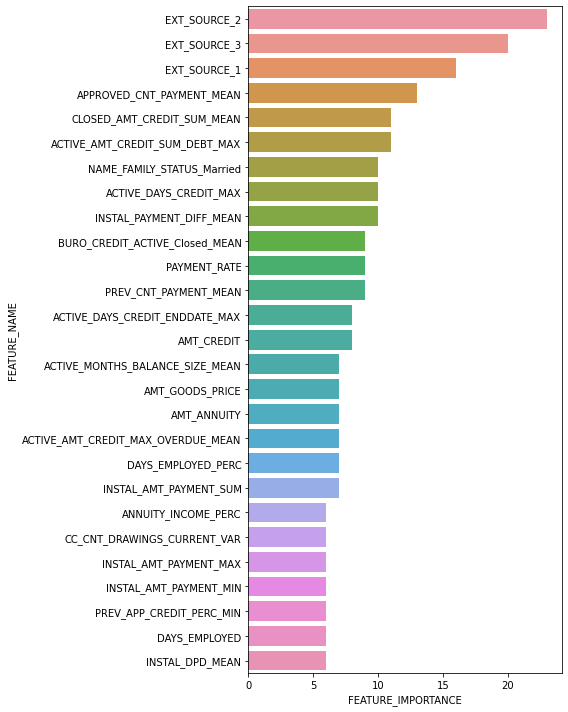

In [51]:
plt.figure(figsize=(8, 10))
sns.barplot(x="FEATURE_IMPORTANCE", y="FEATURE_NAME", data=df_feature_importance.sort_values(by="FEATURE_IMPORTANCE", ascending=False).head(27))
plt.tight_layout()

In [53]:
list_feature.append('DAYS_BIRTH')
list_feature.append('AMT_INCOME_TOTAL')
list_feature.append('DAYS_ID_PUBLISH')
list_feature.append('DAYS_LAST_PHONE_CHANGE')

In [54]:
# Sauvegarde list_feature
with open('list_feature.pkl', 'wb') as f:
    pickle.dump(list_feature, f)

In [55]:
list_col_bin_encod_light = list_col_bin_encod
list_col_binary_light = [col for col in list_col_binary if (col in list_feature)]
list_ID_customer_light = list_ID_customer
num_cols_light = [col for col in num_cols if (col in list_feature)]

In [56]:
len(list_col_bin_encod_light)+len(list_col_binary_light)+len(list_ID_customer_light)+len(num_cols_light)

35

In [57]:
new_cols = list_col_bin_encod_light + list_col_binary_light + list_ID_customer_light + num_cols_light + ['TARGET']

In [58]:
with open('list_col_bin_encod_light.pkl', 'wb') as f:
    pickle.dump(list_col_bin_encod_light, f)

In [59]:
with open('list_col_binary_light.pkl', 'wb') as f:
    pickle.dump(list_col_binary_light, f)

In [60]:
with open('list_ID_customer_light.pkl', 'wb') as f:
    pickle.dump(list_ID_customer_light, f)

In [61]:
with open('num_cols_light.pkl', 'wb') as f:
    pickle.dump(num_cols_light, f)

In [62]:
with open('new_cols.pkl', 'wb') as f:
    pickle.dump(new_cols, f)

## Modèle avec feature selection

Finalement, le modèle être composé de 100 colonnes, issues de la détermination de l'importance des features.

In [8]:
with open('list_feature.pkl', 'rb') as f:
    list_feature = pickle.load(f)

In [9]:
with open('list_col_bin_encod_light.pkl', 'rb') as f:
    list_col_bin_encod_light = pickle.load(f)

In [10]:
with open('list_col_binary_light.pkl', 'rb') as f:
    list_col_binary_light = pickle.load(f)

In [11]:
with open('list_ID_customer_light.pkl', 'rb') as f:
    list_ID_customer_light = pickle.load(f)

In [12]:
with open('num_cols_light.pkl', 'rb') as f:
    num_cols_light = pickle.load(f)

In [13]:
with open('new_cols.pkl', 'rb') as f:
    new_cols = pickle.load(f)

In [113]:
data_reduite = data_reduite[new_cols]

In [114]:
data_reduite.shape

(30749, 36)

In [115]:
list_index = data_reduite.index.tolist()

In [116]:
data_complementaire = train_df.copy()
data_complementaire = data_complementaire[new_cols]
data_complementaire = data_complementaire.drop(index=list_index, axis=0)

In [117]:
data_complementaire = data_complementaire.reset_index(drop=True)

In [118]:
y = data_reduite['TARGET']
y = y.reset_index(drop=True)
X = data_reduite.copy()
X = X.drop(["TARGET"], axis=1)
X = X.reset_index(drop=True)

Je partage le dataframe data_reduite en deux parties :
    - une partie train : pour entrainer les modèles
    - une partie test 

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [120]:
y_train.value_counts()

0.0    21136
1.0     1925
Name: TARGET, dtype: int64

In [121]:
y_test.value_counts()

0.0    7046
1.0     642
Name: TARGET, dtype: int64

In [125]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [126]:
# Sauvegarde des data train et test
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

In [6]:
# Lecture des data train et test
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

In [127]:
y_comp = data_complementaire['TARGET']
y_comp = y_comp.reset_index(drop=True)
X_comp = data_complementaire.copy()
X_comp = X_comp.drop(["TARGET"], axis=1)
X_comp = X_comp.reset_index(drop=True)

In [34]:
improved_results_final = pd.DataFrame(columns=['MODEL','TIME', 'BEST_PIPE', 'TRAIN_ROC_AUC_MEAN', 'TRAIN_ROC_AUC_MEAN_STD',
                                   'VAL_ROC_AUC_MEAN', 'VAL_ROC_AUC_MEAN_STD', 'TRAIN_F2_MEAN', 'TRAIN_F2_STD',       
                                   'VAL_F2_MEAN', 'TEST_F2_STD', 'TRAIN_COST_SCORE_MEAN', 'TRAIN_COST_SCORE_STD',        
                                   'VAL_COST_SCORE_MEAN', 'VAL_COST_SCORE_STD'])

In [23]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# calculate cost_score
def score_cost(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True )
    cost_score = (9*report['0.0']['precision']+ report['0.0']['recall']+report['1.0']['precision']+9*report['1.0']['recall'])/20
    return cost_score

In [36]:
def grid_search(X_train, y_train, pipeline, parameters):
    train_roc_auc = []
    train_f2_score =[]
    val_roc_auc = []
    val_f2_score =[]
    train_cost_score = []
    val_cost_score = []
    
    X_train = X_train.reset_index()
    y_train = y_train.reset_index(drop=True)
    
    # define evaluation procedure
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)   
    
    my_scorer = make_scorer(score_cost, greater_is_better=True)
    
    search = GridSearchCV(pipeline, parameters, scoring=my_scorer, cv=cv, n_jobs=-1)

    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        best_pipe = search.best_estimator_
        y_hat_t = search.predict(X_t)
        roc_auc_score_train = roc_auc_score(y_t, y_hat_t)
        f2_score_train = f2_measure(y_t, y_hat_t)
        cost_score_train = score_cost(y_t, y_hat_t)
        train_roc_auc.append(roc_auc_score_train)
        train_f2_score.append(f2_score_train)
        train_cost_score.append(cost_score_train)
         
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        roc_auc_score_val = roc_auc_score(y_val, y_hat_val)
        f2_score_val = f2_measure(y_val, y_hat_val)
        cost_score_val = score_cost(y_val, y_hat_val)
        val_roc_auc.append(roc_auc_score_val)
        val_f2_score.append(f2_score_val)
        val_cost_score.append(cost_score_val)
       
    return best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score



def models_parameters(models):
    if str(models) == 'LGBMClassifier(max_depth=1)' : 
        parameters = {'classifier__n_estimators': [450, 500, 550],  
                'classifier__reg_alpha': [1.4, 1.5, 1.6],
                'classifier__reg_lambda': [1.4, 1.5, 1.6]}
    
    return parameters

# define models
#models, names = get_models()
results_AUC = list()
results_F2 = list()
results_time = list()                      
 
models = [LGBMClassifier(max_depth=1)]

names = ['LGBM']
                  
# evaluate each model
for i in range(len(models)):
    
    results_inter = [models[i]]
    
    #Creating the pipeline preprocessor
    numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
    binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
    preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols_light),
            ('bin', binary_transformer, list_col_binary_light),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')
     
    # wrap the model i a pipeline
    threshold = 0.20
    
    pipeline = imbpipeline(steps=[('preprocess',preprocessor),
                                  ('sampler', RandomOverSampler()),
                               ('classifier',models[i])])
    
    parameters = models_parameters(models[i])

    # evaluate the model and store results
    start = timer()                  
    best_pipe, train_roc_auc, train_f2_score, train_cost_score, val_roc_auc, val_f2_score, val_cost_score = grid_search(X_train, y_train, pipeline, parameters)
    end = timer()
    time = end - start                  
    
    results_inter.append(time)
    results_inter.append(best_pipe)
    results_inter.append(mean(train_roc_auc))
    results_inter.append(std(train_roc_auc))
    results_inter.append(mean(val_roc_auc))
    results_inter.append(std(val_roc_auc))
    
    results_inter.append(mean(train_f2_score))
    results_inter.append(std(train_f2_score))
    results_inter.append(mean(val_f2_score))
    results_inter.append(std(val_f2_score))
    
    results_inter.append(mean(train_cost_score))
    results_inter.append(std(train_cost_score))
    results_inter.append(mean(val_cost_score))
    results_inter.append(std(val_cost_score))
    

    # summarize and store
    print('AUC : %s %.3f (%.3f)' % (names[i], mean(train_roc_auc), std(train_roc_auc)))
    print('F2 : %s %.3f (%.3f)' % (names[i], mean(train_f2_score), std(train_f2_score)))
    results_inter_2 = pd.DataFrame([results_inter], columns = improved_results_final.columns) 
    improved_results_final = improved_results_final.append(results_inter_2, ignore_index=True)                   

AUC : LGBM 0.728 (0.002)
F2 : LGBM 0.465 (0.002)


In [37]:
improved_results_final

,MODEL,TIME,BEST_PIPE,TRAIN_ROC_AUC_MEAN,TRAIN_ROC_AUC_MEAN_STD,VAL_ROC_AUC_MEAN,VAL_ROC_AUC_MEAN_STD,TRAIN_F2_MEAN,TRAIN_F2_STD,VAL_F2_MEAN,TEST_F2_STD,TRAIN_COST_SCORE_MEAN,TRAIN_COST_SCORE_STD,VAL_COST_SCORE_MEAN,VAL_COST_SCORE_STD
0,LGBMClassifier(max_depth=1),1483.756063,"(ColumnTransformer(remainder='passthrough',\n ...",0.727713,0.001788,0.69468,0.007621,0.465065,0.002298,0.426707,0.008623,0.812773,0.001606,0.781332,0.008595


In [38]:
improved_results_final.to_csv("Improved_results_final.csv")

In [39]:
best_pipe = improved_results_final.loc[0,"BEST_PIPE"]
best_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_ID_PUBLISH',
                                                   'REGION_RATING_CLIENT_W_CITY',
     

### Résultats avec X_test

In [19]:
numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])
    
binary_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                    fill_value=0))])
    
preprocessor = ColumnTransformer(
            transformers=[
            ('num', numeric_transformer, num_cols_light),
            ('bin', binary_transformer, list_col_binary_light),
            ('drop_ID', 'drop', list_ID_customer)],
            remainder='passthrough')

best_pipe = imbpipeline(steps=[('preprocess',preprocessor),
                                ('sampler', RandomOverSampler()),
                               ('classifier', LGBMClassifier(max_depth=1, n_estimators=450, reg_alpha=1.4,
                                reg_lambda=1.4))])

In [20]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_ID_PUBLISH',
                                                   'EXT_SOURCE_1',
                

In [131]:
with open('best_pipes.pkl', 'wb') as f:
    pickle.dump(best_pipe, f)

In [21]:
y_pred = best_pipe.predict(X_test)

In [24]:
f2_measure(y_test, y_pred)

0.44167497507477566

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82      7046
         1.0       0.18      0.69      0.29       641

    accuracy                           0.71      7687
   macro avg       0.57      0.70      0.55      7687
weighted avg       0.90      0.71      0.78      7687



In [26]:
score_cost(y_test, y_pred)

0.7887695415026157

In [27]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print(conf_mat)

[[5038 2008]
 [ 198  443]]


### Résultats avec X_complémentaire

En utilisant une plus grande base de données, les résulats sont similaires à ceux obtenus avec uniquement X_test.

In [137]:
X_comp.shape

(276739, 35)

In [138]:
y_pred_comp = best_pipe.predict(X_comp)

In [139]:
f2_measure(y_comp, y_pred_comp)

0.4215764398704667

In [140]:
print(classification_report(y_comp, y_pred_comp))

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82    254380
         1.0       0.17      0.67      0.27     22359

    accuracy                           0.71    276739
   macro avg       0.57      0.69      0.55    276739
weighted avg       0.90      0.71      0.78    276739



In [141]:
score_cost(y_comp, y_pred_comp)

0.776825901552191

In [142]:
conf_mat = metrics.confusion_matrix(y_comp, y_pred_comp)
print(conf_mat)

[[181792  72588]
 [  7440  14919]]


## Coût en fonction du seuil

### Détermination du seuil optimal de predict_proba

Best Threshold=0.524724, G-Mean=0.702


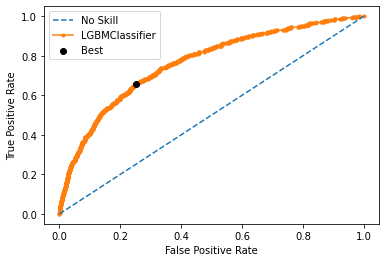

In [143]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat = best_pipe.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold (G-Mean = sqrt(Sensitivity * Specificity))
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='LGBMClassifier', zorder=1)
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=2)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Impact du seuil de predict_proba

Selon le seuil utilisé pour predict_proba, il y aura plus ou moins d'acceptation de crédit de la part de la banque.

In [144]:
df_threshold_curve = pd.DataFrame()
df_threshold_curve['y_test'] = y_test
df_threshold_curve['y_pred'] = y_pred

In [145]:
thres = [0.40, 0.45, 0.55, 0.60]

for i in thres :
    y_pred_thres_bool = (best_pipe.predict_proba(X_test)[:,0] >= i)

    y_pred_thres = []
    for score in range(len(y_pred_thres_bool)) :
        if y_pred_thres_bool[score] == False :
            y_pred_thres.append(1)
        else :
            y_pred_thres.append(0)
        
    df_threshold_curve['y_pred_thres_'+str(i)] = y_pred_thres

In [146]:
df_threshold_curve.head(50)

,y_test,y_pred,y_pred_thres_0.4,y_pred_thres_0.45,y_pred_thres_0.55,y_pred_thres_0.6
0,0.0,0.0,0,0,0,1
1,0.0,0.0,0,0,0,0
2,0.0,0.0,0,0,0,0
3,0.0,0.0,0,0,0,0
4,0.0,1.0,1,1,1,1
5,0.0,0.0,0,0,0,1
6,0.0,1.0,1,1,1,1
7,0.0,0.0,0,0,0,0
8,0.0,1.0,1,1,1,1
9,0.0,0.0,0,0,0,0


### Courbe de la fonction coût

Hypothèse : 

Le coût lié a l'acceptation du prêt à une personne insolvable est dix fois plus cher que celui de perdre une personne de la banque (prêt refusé pour une personne solvable).

Avec la matrice de confusion :

<img src="Matrice confusion.png"/>

Je définis la fonction de coût comme : FP + 10 x FN

Ce coût doit être le plus faible possible, pour minimiser les pertes de la banque.

In [147]:
list_cost = []

thres = np.arange(0.1,1,0.01)

for i in thres :
    y_pred_thres_bool = (best_pipe.predict_proba(X_test)[:,0] >= i)

    y_pred_thres = []
    for score in range(len(y_pred_thres_bool)) :
        if y_pred_thres_bool[score] == False :
            y_pred_thres.append(1)
        else :
            y_pred_thres.append(0)
    conf_mat = metrics.confusion_matrix(y_test, y_pred_thres)
    cost = conf_mat[1][0]*10+conf_mat[0][1]
    list_cost.append(cost)
    

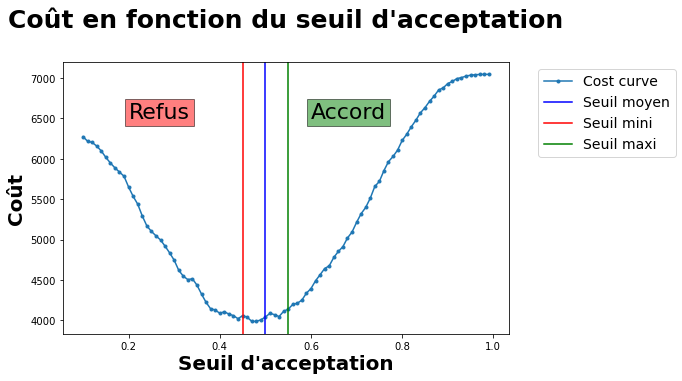

In [148]:
plt.figure(figsize=(8,5))
plt.plot(thres, list_cost, marker='.', label='Cost curve')
plt.axvline(x=0.5,color='blue', label="Seuil moyen")
plt.axvline(x=0.45,color='red', label="Seuil mini")
plt.axvline(x=0.55,color='green', label="Seuil maxi")

plt.title('Coût en fonction du seuil d\'acceptation', fontsize = 25, pad = 35, fontweight = 'bold')
plt.xlabel('Seuil d\'acceptation', fontsize = 20, fontweight = 'bold')
plt.ylabel('Coût', fontsize = 20, fontweight = 'bold')
plt.legend(prop={'size': 14},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(0.2, 6500, 'Refus', fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
plt.text(0.6, 6500, 'Accord', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.5))
plt.show()

### Création d'une matrice de choix

Selon la valeur de predict_proba de la classe négative (0 - ceux qui n'ont pas de problèmes de prêt), le prêt sera accordé ou non :
    
    - valeur > 0.55 : prêt accordé
    - valeur < 0.45 : prêt refusé
    - 0.45 < valeur < 0.55 : prêt refusé, évaluation à refaire, prêt peut être soumis à conditions

In [28]:
list_score = best_pipe.predict_proba(X_test)
list_score_0 = []
list_score_1 = []

for i in range(len(list_score)) :
    scores_0 = list_score[i][0]
    scores_1 = list_score[i][1]
    list_score_0.append(scores_0)
    list_score_1.append(scores_1)

In [29]:
df_threshold = pd.DataFrame()
#y_pred = best_pipe.predict(X_test)
df_threshold['y_test'] = y_test
df_threshold['y_pred'] = y_pred
df_threshold['scores_0'] = list_score_0
df_threshold['scores_1'] = list_score_1

df_threshold = df_threshold.reset_index(drop=True)
df_threshold

,y_test,y_pred,scores_0,scores_1
0,0.0,0.0,0.548665,0.451335
1,0.0,0.0,0.713229,0.286771
2,0.0,0.0,0.723119,0.276881
3,0.0,0.0,0.660779,0.339221
4,0.0,1.0,0.218437,0.781563
...,...,...,...,...
7682,0.0,0.0,0.633016,0.366984
7683,0.0,1.0,0.320110,0.679890
7684,0.0,0.0,0.745424,0.254576
7685,0.0,0.0,0.825795,0.174205


In [30]:
thres = [0.45, 0.55]

for i in thres :
    y_pred_thres_bool = (best_pipe.predict_proba(X_test)[:,0] >= i)
    y_pred_thres = []
    for score in range(len(y_pred_thres_bool)) :
        if y_pred_thres_bool[score] == False :
            y_pred_thres.append(1)
        else :
            y_pred_thres.append(0)
        
    df_threshold['y_pred_thres_'+str(i)] = y_pred_thres

In [31]:
df_threshold[(df_threshold['y_test'] == 1) & (df_threshold['y_pred'] == 0)
            & (df_threshold['scores_0'] > 0.45) & (df_threshold['scores_0'] < 0.55)]

,y_test,y_pred,scores_0,scores_1,y_pred_thres_0.45,y_pred_thres_0.55
188,1.0,0.0,0.500796,0.499204,0,1
236,1.0,0.0,0.530304,0.469696,0,1
584,1.0,0.0,0.500623,0.499377,0,1
778,1.0,0.0,0.529122,0.470878,0,1
891,1.0,0.0,0.546195,0.453805,0,1
920,1.0,0.0,0.544277,0.455723,0,1
1054,1.0,0.0,0.517316,0.482684,0,1
1151,1.0,0.0,0.515059,0.484941,0,1
1170,1.0,0.0,0.520377,0.479623,0,1
1184,1.0,0.0,0.503872,0.496128,0,1


In [32]:
df_threshold[(df_threshold['scores_0'] > 0.45) & (df_threshold['scores_0'] < 0.55)]

,y_test,y_pred,scores_0,scores_1,y_pred_thres_0.45,y_pred_thres_0.55
0,0.0,0.0,0.548665,0.451335,0,1
21,0.0,0.0,0.524115,0.475885,0,1
22,0.0,1.0,0.468348,0.531652,0,1
26,0.0,0.0,0.507296,0.492704,0,1
50,0.0,1.0,0.483647,0.516353,0,1
...,...,...,...,...,...,...
7642,1.0,0.0,0.520314,0.479686,0,1
7652,0.0,0.0,0.535108,0.464892,0,1
7658,0.0,0.0,0.549021,0.450979,0,1
7676,0.0,1.0,0.468620,0.531380,0,1


## LIME

In [154]:
pipeline_lime = imbpipeline(steps=[('preprocess',preprocessor)])

In [155]:
pipeline_lime.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_ID_PUBLISH',
                                                   'EXT_SOURCE_1',
                

In [156]:
list_1 = pipeline_lime.named_steps['preprocess'].transformers_[0][2]
list_1

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_EMPLOYED_PERC',
 'ANNUITY_INCOME_PERC',
 'PAYMENT_RATE',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MAX',
 'ACTIVE_MONTHS_BALANCE_SIZE_MEAN',
 'CLOSED_AMT_CREDIT_SUM_MEAN',
 'PREV_APP_CREDIT_PERC_MIN',
 'PREV_CNT_PAYMENT_MEAN',
 'APPROVED_CNT_PAYMENT_MEAN',
 'INSTAL_DPD_MEAN',
 'INSTAL_PAYMENT_DIFF_MEAN',
 'INSTAL_AMT_PAYMENT_MIN',
 'INSTAL_AMT_PAYMENT_MAX',
 'INSTAL_AMT_PAYMENT_SUM',
 'CC_CNT_DRAWINGS_CURRENT_VAR']

In [157]:
list_2 = pipeline_lime.named_steps['preprocess'].transformers_[1][2]
list_2

['NAME_FAMILY_STATUS_Married']

In [158]:
list_3 = pipeline_lime.named_steps['preprocess'].transformers_[3][2]
list_3

[0, 1, 2]

In [159]:
list_3 = [new_cols[0], new_cols[1], new_cols[2]]
list_3

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [160]:
features_lime = list_1 + list_2 + list_3

In [161]:
len(features_lime)

34

In [162]:
# Sauvegarde de la liste features_lime
with open('features_lime.pkl', 'wb') as f:
    pickle.dump(features_lime, f)

In [74]:
with open('features_lime.pkl', 'rb') as f:
    features_lime = pickle.load(f)

In [163]:
X_train_lime = pipeline_lime.fit_transform(X_train)
X_train_lime.shape

(23061, 34)

In [164]:
X_test_lime = pipeline_lime.transform(X_test)
X_test_lime.shape

(7687, 34)

In [165]:
# Sauvegarde de pipeline_lime
with open('pipeline_lime.pkl', 'wb') as f:
    pickle.dump(pipeline_lime, f)

In [166]:
# Sauvegarde de X_train_lime
with open('X_train_lime.pkl', 'wb') as f:
    pickle.dump(X_train_lime, f)

In [167]:
explainer = lime_tabular.LimeTabularExplainer(X_train_lime, mode="classification",
                                    class_names= ["Accordé", "Refusé"],
                                             feature_names=features_lime)


In [168]:
# Sauvegarde de explainer
with open('explainer', 'wb') as f:
    dill.dump(explainer, f)

In [82]:
with open('explainer', 'rb') as f:
    dill.load(f)

In [169]:
model_lime = imbpipeline(steps=[('sampler', RandomOverSampler()),
                           ('classifier', LGBMClassifier(max_depth=1, n_estimators=450, reg_alpha=1.4,
                                reg_lambda=1.4))])

In [170]:
model_lime.fit(X_train_lime, y_train)

Pipeline(steps=[('sampler', RandomOverSampler()),
                ('classifier',
                 LGBMClassifier(max_depth=1, n_estimators=450, reg_alpha=1.4,
                                reg_lambda=1.4))])

In [171]:
# Sauvegarde de model_lime
with open('model_lime.pkl', 'wb') as f:
    pickle.dump(model_lime, f)

In [172]:
best_pipe.predict_proba(X_test)

array([[0.5608103 , 0.4391897 ],
       [0.6817307 , 0.3182693 ],
       [0.71615966, 0.28384034],
       ...,
       [0.74823419, 0.25176581],
       [0.83582868, 0.16417132],
       [0.29760798, 0.70239202]])

In [173]:
model_lime.predict_proba(X_test_lime)

array([[0.59599057, 0.40400943],
       [0.71596623, 0.28403377],
       [0.74488003, 0.25511997],
       ...,
       [0.73524518, 0.26475482],
       [0.85207573, 0.14792427],
       [0.27806409, 0.72193591]])

In [174]:
explanation = explainer.explain_instance(X_test_lime[67], model_lime.predict_proba, num_features=20)
explanation.show_in_notebook()

In [175]:
explanation.as_map()

{1: [(29, -0.16603564269411697),
  (9, -0.12187479151607496),
  (8, -0.10303920232048487),
  (7, -0.10111057881973654),
  (28, 0.08433361687938509),
  (17, -0.04566939806004417),
  (31, -0.04556942471573346),
  (25, -0.04304455194615471),
  (15, 0.04248892562112803),
  (5, 0.035726825578786814),
  (32, 0.035373505835064475),
  (22, 0.029569729597767686),
  (23, 0.02820761250318428),
  (2, -0.02777630521796154),
  (14, -0.025020216175176423),
  (18, -0.024093862121786),
  (16, -0.021220022764700835),
  (3, 0.018571852914546518),
  (24, 0.016922896978961963),
  (27, 0.01513864676377574)]}

In [176]:
liste_features_LIME = explanation.as_map()[1]
features_explained_LIME = []

for i in range(len(liste_features_LIME)) :
    features_explained_LIME.append(features_lime[liste_features_LIME[i][0]])

In [177]:
features_explained_LIME

['CC_CNT_DRAWINGS_CURRENT_VAR',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'INSTAL_AMT_PAYMENT_SUM',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'CODE_GENDER',
 'INSTAL_PAYMENT_DIFF_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'DAYS_EMPLOYED',
 'FLAG_OWN_CAR',
 'PREV_CNT_PAYMENT_MEAN',
 'APPROVED_CNT_PAYMENT_MEAN',
 'AMT_ANNUITY',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MAX',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX',
 'AMT_GOODS_PRICE',
 'INSTAL_DPD_MEAN',
 'INSTAL_AMT_PAYMENT_MAX']

In [178]:
X_test_lime_df = pd.DataFrame(data=X_test_lime, columns=features_lime)
X_test_lime_df

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,INSTAL_DPD_MEAN,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_SUM,CC_CNT_DRAWINGS_CURRENT_VAR,NAME_FAMILY_STATUS_Married,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,-1.140278,-0.111688,-0.632844,-0.204927,0.197894,-2.344936,0.794899,0.010365,0.090719,-0.888121,...,-0.112362,0.072965,-0.221197,-0.517111,-0.600273,-0.107272,1.0,1.0,0.0,0.0
1,-0.470594,-1.037195,-0.907669,-1.022425,0.282801,-0.282904,-1.057329,-1.159466,-0.976988,0.732010,...,-0.112362,-0.744578,-0.443488,0.085416,-0.192244,-0.107272,1.0,1.0,0.0,0.0
2,-1.140278,-0.922520,-1.104643,-0.842094,-0.704497,-3.221625,0.196426,0.000536,0.055179,0.587448,...,-0.106178,0.072965,0.085092,4.467939,1.612277,-0.107272,1.0,1.0,1.0,0.0
3,-0.336657,-1.032997,-1.260971,-0.962314,1.433274,0.787624,1.910596,1.717260,0.525765,0.113880,...,-0.086325,-0.565390,-0.380502,-0.253806,-0.353968,-0.107272,1.0,1.0,1.0,0.0
4,-0.872404,-0.538238,-0.925178,-0.601654,-1.235220,0.289780,-1.071862,0.010365,-2.316205,-1.235222,...,0.057533,0.151384,-0.549329,-0.094509,-0.226967,-0.044418,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7682,1.002712,3.364151,2.422750,3.365615,0.093534,0.478970,-1.062614,-2.318755,-1.491517,0.358798,...,-0.112362,0.072965,0.747135,-0.161696,-0.592088,-0.107272,1.0,0.0,0.0,0.0
7683,2.342081,-0.812043,-0.928617,-0.721874,-0.667193,0.934978,1.872944,0.010365,-1.077030,-1.784143,...,-0.034564,0.171007,-0.552015,1.923723,2.531664,0.034579,0.0,1.0,1.0,0.0
7684,0.779484,0.756725,1.478527,0.985254,-1.645107,0.289780,-0.720441,0.010365,0.521554,0.226725,...,-0.096404,0.122952,-0.547544,-0.473123,-0.417271,-0.107272,1.0,1.0,0.0,0.0
7685,-1.229569,-1.121599,-0.888284,-1.082535,-1.358346,-2.438369,-0.694018,0.010365,0.311033,1.803202,...,-0.108239,0.072965,-0.303964,-0.399874,-0.379734,-0.107272,1.0,1.0,0.0,0.0


# Graphiques pour dashboard

In [179]:
features_explained_LIME[:5]

['CC_CNT_DRAWINGS_CURRENT_VAR',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'INSTAL_AMT_PAYMENT_SUM']

In [180]:
liste_radar = features_explained_LIME[:5]
liste_radar = liste_radar + list_feature[:5]
liste_radar = list(OrderedDict.fromkeys(liste_radar))

In [181]:
list_feature[:5]

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'APPROVED_CNT_PAYMENT_MEAN',
 'CLOSED_AMT_CREDIT_SUM_MEAN']

In [182]:
#df_radar = data_reduite.copy()
df_radar = X_test_lime_df.copy()
liste_radar = features_explained_LIME[:5]
liste_radar = liste_radar + list_feature[:5]
liste_radar = list(OrderedDict.fromkeys(liste_radar))
df_radar = df_radar.loc[:,liste_radar]
df_radar['TARGET'] = y_test
#df_radar["TARGET"] = y_test
#df_radar["PRED"] = best_pipe.predict(X_test)
df_radar

,CC_CNT_DRAWINGS_CURRENT_VAR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,CLOSED_AMT_CREDIT_SUM_MEAN,TARGET
0,-0.107272,-0.888121,0.090719,0.010365,-0.600273,-0.003304,-0.224090,0.0
1,-0.107272,0.732010,-0.976988,-1.159466,-0.192244,0.787779,-0.407136,0.0
2,-0.107272,0.587448,0.055179,0.000536,1.612277,1.583383,-0.288775,0.0
3,-0.107272,0.113880,0.525765,1.717260,-0.353968,-0.025907,-0.224090,0.0
4,-0.044418,-1.235222,-2.316205,0.010365,-0.226967,-0.658773,-0.280532,0.0
...,...,...,...,...,...,...,...,...
7682,-0.107272,0.358798,-1.491517,-2.318755,-0.592088,-0.206726,0.610002,0.0
7683,0.034579,-1.784143,-1.077030,0.010365,2.531664,1.908858,1.195186,0.0
7684,-0.107272,0.226725,0.521554,0.010365,-0.417271,0.200117,-0.431291,0.0
7685,-0.107272,1.803202,0.311033,0.010365,-0.379734,-0.206726,-0.432830,0.0


In [183]:
df_radar.loc[67,"TARGET"] = 3

In [184]:
target_radar = df_radar.groupby('TARGET').median()
target_radar = target_radar.reset_index()
target_radar

,TARGET,CC_CNT_DRAWINGS_CURRENT_VAR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,CLOSED_AMT_CREDIT_SUM_MEAN
0,0.0,-0.107272,0.113880,0.303646,0.010365,-0.379734,-0.206726,-0.224090
1,1.0,-0.107272,-0.299171,-0.446553,0.010365,-0.402953,-0.206726,-0.224090
2,3.0,-0.107272,1.292912,0.832912,1.334604,-0.651517,1.420646,-0.417109


In [185]:
# The attributes we want to use in our radar plot.
factors = liste_radar

# New scale should be from 0 to 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Do a linear transformation on each variable to change value
# to [0, 100].
for factor in factors:
    max_val = df_radar[factor].max()
    min_val = df_radar[factor].min()
    val_range = max_val - min_val
    target_radar[factor] = target_radar[factor].apply(
          lambda x: (((x - min_val) * new_range) / val_range) + new_min)

In [186]:
target_radar

,TARGET,CC_CNT_DRAWINGS_CURRENT_VAR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,CLOSED_AMT_CREDIT_SUM_MEAN
0,0.0,0.050334,60.628927,69.922045,53.199937,3.194463,16.666667,0.543451
1,1.0,0.050334,52.465585,52.298237,53.199937,2.985250,16.666667,0.543451
2,3.0,0.050334,83.930756,82.355655,73.551669,0.745510,33.333333,0.184718


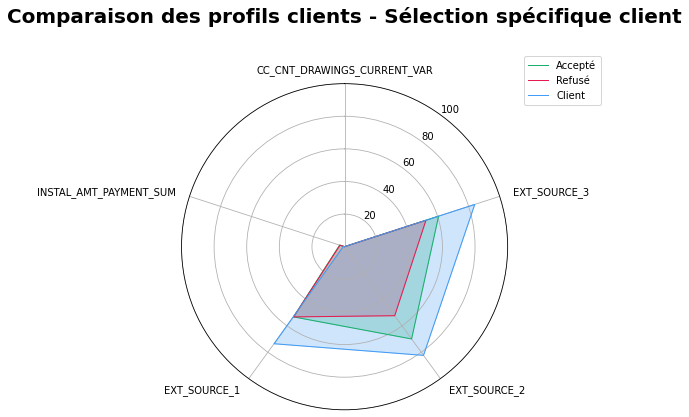

In [187]:
# Each attribute we'll plot in the radar chart.
labels = features_explained_LIME[:5]

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(target_index, color):
    values = target_radar.loc[target_index, labels].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=target_index)
    ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar(0, '#1aaf6c')
add_to_radar(1, '#E61B4D')
add_to_radar(2, '#429bf4')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
        
# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add title.
ax.set_title('Comparaison des profils clients - Sélection spécifique client', y=1.08, fontsize = 20, pad = 35, fontweight = 'bold')

# Add a legend as well.
ax.legend(['Accepté', 'Refusé', 'Client'], loc='upper right',  bbox_to_anchor=(1.3, 1.1))

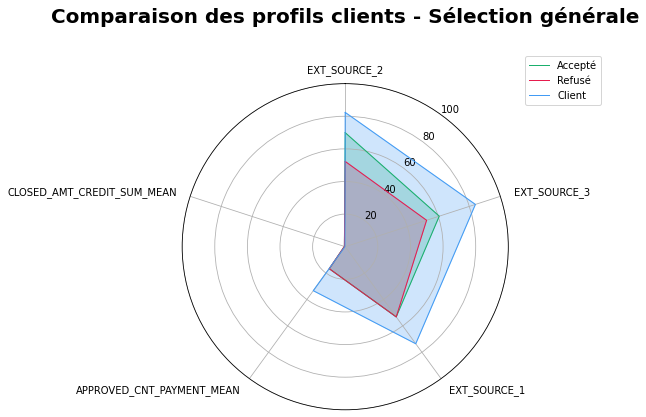

In [188]:
# Each attribute we'll plot in the radar chart.
labels = list_feature[:5]

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(target_index, color):
    values = target_radar.loc[target_index, labels].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=target_index)
    ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar(0, '#1aaf6c')
add_to_radar(1, '#E61B4D')
add_to_radar(2, '#429bf4')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
        
# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add title.
ax.set_title('Comparaison des profils clients - Sélection générale', y=1.08, fontsize = 20, pad = 35, fontweight = 'bold')

# Add a legend as well.
ax.legend(['Accepté', 'Refusé', 'Client'], loc='upper right',  bbox_to_anchor=(1.3, 1.1))